# In-vehicle coupon recommendation Data Set
#### Objective
To predict whether a person will accept the coupon recommended to him or not in different driving scenarios



#### Dataset
This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper:
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.


#### Attribute Information:

* destination: No Urgent Place, Home, Work
* passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
* weather: Sunny, Rainy, Snowy
* temperature:55, 80, 30
* time: 2PM, 10AM, 6PM, 7AM, 10PM
* coupon: Restaurant(<$\$$20), Coffee House, Carry out & Take away, Bar, Restaurant($\$$20-$\$$50)
* expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
* gender: Female, Male
* age: 21, 46, 26, 31, 41, 50plus, 36, below21
* maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
* has_Children:1, 0
* education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
* occupation: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
* income: $\$$37500 - $\$$49999, $\$$62500 - $\$$74999, $\$$12500 - $\$$24999, $\$$75000 - $\$$87499, $\$$50000 - $\$$62499, $\$$25000 - $\$$37499, $\$$100000 or More, $\$$87500 - $\$$99999, Less than $\$$12500
* Bar: never, less1, 1\~3, gt8, nan, 4\~8 (feature meaning: how many times do you go to a bar every month?)
* CoffeeHouse: never, less1, 4\~8, 1\~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
* CarryAway:n4\~8, 1\~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
* RestaurantLessThan20: 4\~8, 1\~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $\$$20 every month?)
* Restaurant20To50: 1\~3, less1, never, gt8, 4\~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $\$$20 - $\$$50 every month?)
* toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
* toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
* direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* Y:1, 0 (whether the coupon is accepted)

# Preprocessing ``train.csv`` 

#### Importing and Exploring data

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 6))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (18, 30)


Read data

In [378]:
df = pd.read_csv("train.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Partner,Sunny,30.0,10AM,Bar,1d,Female,50plus,Single,...,1~3,less1,1~3,less1,1,1,0,0,1,0
1,Home,Alone,Sunny,80.0,6PM,Coffee House,2h,Female,26,Unmarried partner,...,less1,1~3,less1,1~3,1,0,0,0,1,1
2,Work,Alone,Sunny,55.0,7AM,Restaurant(<20),1d,Male,50plus,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
3,No Urgent Place,Kid(s),Sunny,80.0,10AM,Bar,1d,Female,NaN,Married partner,...,less1,4~8,1~3,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,30.0,10PM,Restaurant(<20),2h,Male,26,Married partner,...,1~3,1~3,4~8,4~8,1,0,0,0,1,1


Viewing datatype of each feature

In [379]:
df.dtypes

destination              object
passanger                object
weather                  object
temperature             float64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children            float64
education                object
occupation               object
income                   object
car                      object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object

Get basic information about the dataframe

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           2378 non-null   object 
 1   passanger             2378 non-null   object 
 2   weather               2331 non-null   object 
 3   temperature           2344 non-null   float64
 4   time                  2378 non-null   object 
 5   coupon                2378 non-null   object 
 6   expiration            2378 non-null   object 
 7   gender                2329 non-null   object 
 8   age                   2326 non-null   object 
 9   maritalStatus         2378 non-null   object 
 10  has_children          2332 non-null   float64
 11  education             2378 non-null   object 
 12  occupation            2378 non-null   object 
 13  income                2378 non-null   object 
 14  car                   16 non-null     object 
 15  Bar                  

#### Dropping unwanted features

In [385]:
df.isna().sum()

destination                0
passanger                  0
weather                   47
temperature               34
time                       0
coupon                     0
expiration                 0
gender                    49
age                       52
maritalStatus              0
has_children              46
education                  0
occupation                 0
income                     0
car                     2362
Bar                       20
CoffeeHouse               40
CarryAway                 23
RestaurantLessThan20      26
Restaurant20To50          27
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Y                          0
dtype: int64

Percentage of null values

In [386]:
round(((df.isnull().sum()/len(df))*100),2)

destination              0.00
passanger                0.00
weather                  1.98
temperature              1.43
time                     0.00
coupon                   0.00
expiration               0.00
gender                   2.06
age                      2.19
maritalStatus            0.00
has_children             1.93
education                0.00
occupation               0.00
income                   0.00
car                     99.33
Bar                      0.84
CoffeeHouse              1.68
CarryAway                0.97
RestaurantLessThan20     1.09
Restaurant20To50         1.14
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

Dropping feature 'car' as 99.33% of values are null

In [387]:
df = df.drop('car', axis=1)

Correlation matrix

<ipython-input-388-aebec34e8273>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


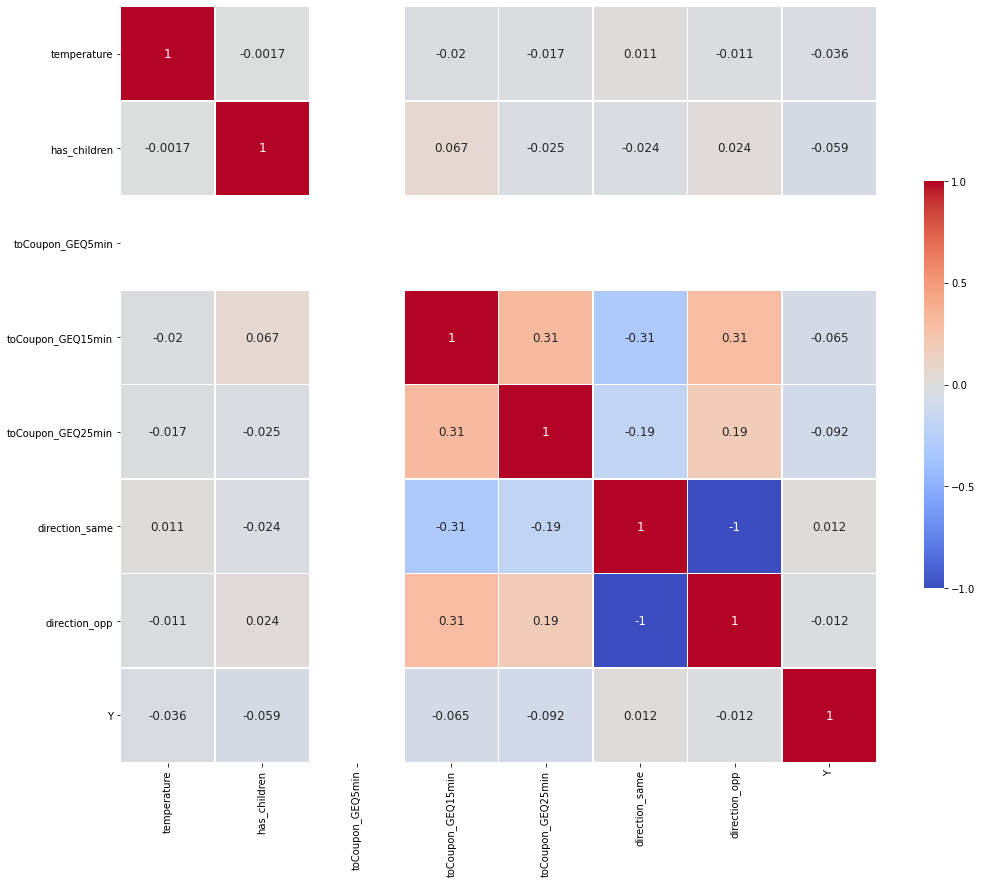

In [388]:
import seaborn as sns

mask = np.zeros_like(df.corr(), dtype=np.bool)
f, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(df.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(df.corr().columns, rotation = 0)
ax.set_xticklabels(df.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.tight_layout()


Dropping feature 'direction_opp' as it is correlated to 'direction_same'. One implies the other and hence is redundant.

In [389]:
df = df.drop('direction_opp', axis=1)

#### Making lists of variable types for numerical and categorical data

In [390]:
categorical = [var for var in df.columns if var not in(['Y'])]
print(f'There are {len(categorical)} categorical variables\n')
print(categorical)

There are 23 categorical variables

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same']


#### Imputing missing values

In [394]:
df.isna().sum()

destination              0
passanger                0
weather                 47
temperature             34
time                     0
coupon                   0
expiration               0
gender                  49
age                     52
maritalStatus            0
has_children            46
education                0
occupation               0
income                   0
Bar                     20
CoffeeHouse             40
CarryAway               23
RestaurantLessThan20    26
Restaurant20To50        27
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
Y                        0
dtype: int64

Weather

<AxesSubplot:title={'center':'Coupon Acceptance by Weather'}, xlabel='weather'>

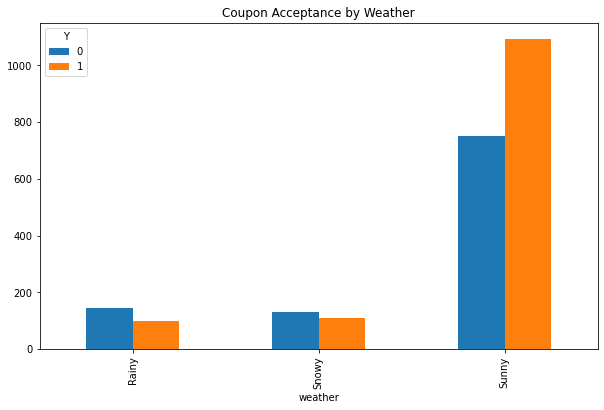

In [395]:
weather_val_xt = pd.crosstab(df['weather'], df['Y'])
weather_val_xt.plot(kind = 'bar', title='Coupon Acceptance by Weather')

Since the majority of instances have weather 'Sunny' we assign the missing values in job to 'Sunny'.

In [396]:
df['weather'].replace(np.NaN, 'Sunny',inplace = True)

Temperature

<AxesSubplot:title={'center':'Coupon Acceptance by temperature'}, xlabel='temperature'>

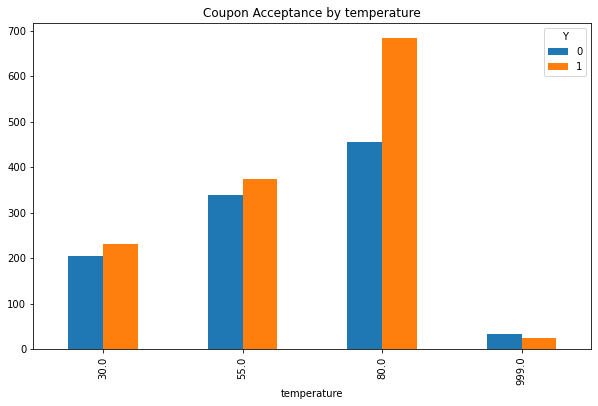

In [397]:
temperature_val_xt = pd.crosstab(df['temperature'], df['Y'])
temperature_val_xt.plot(kind = 'bar', title='Coupon Acceptance by temperature')

In [398]:
df.temperature.value_counts()

80.0     1138
55.0      711
30.0      436
999.0      59
Name: temperature, dtype: int64

Temperature cannot be 999. Hence we convert into null.

In [399]:
df['temperature'].replace(999, np.NaN, inplace = True)

In [400]:
df.temperature.value_counts()

80.0    1138
55.0     711
30.0     436
Name: temperature, dtype: int64

Since the majority of instances have temperature 80 we assign the missing values in temperature to 80.

In [401]:
df['temperature'].replace(np.NaN, 80, inplace = True)

Gender

<AxesSubplot:title={'center':'Coupon Acceptance by gender'}, xlabel='gender'>

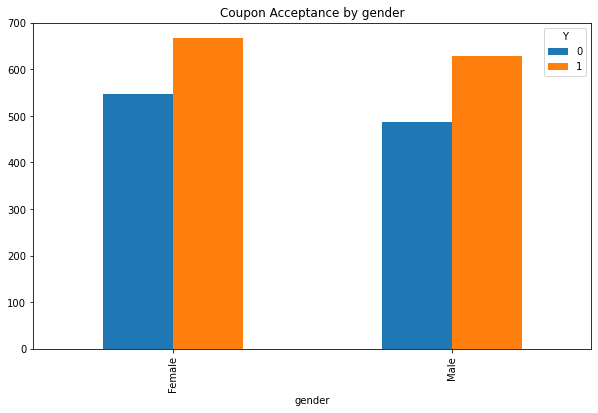

In [402]:
gender_val_xt = pd.crosstab(df['gender'], df['Y'])
gender_val_xt.plot(kind = 'bar', title='Coupon Acceptance by gender')

In [403]:
df.gender.value_counts()

Female    1214
Male      1115
Name: gender, dtype: int64

Since the majority of instances have gender "Female" we assign the missing values in gender to 'Female'.

In [404]:
df['gender'].replace(np.NaN, 'Female', inplace = True)

Age

<AxesSubplot:title={'center':'Coupon Acceptance by age'}, xlabel='age'>

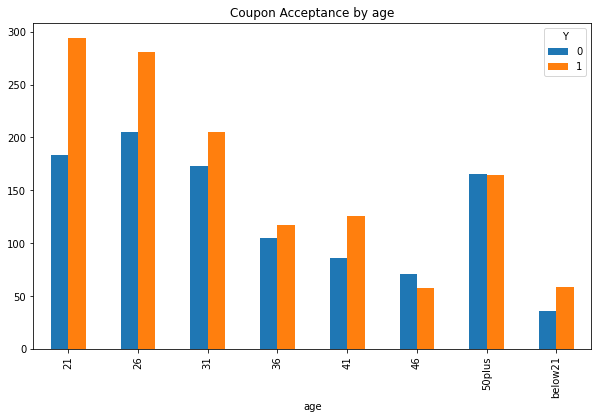

In [405]:
age_val_xt = pd.crosstab(df['age'], df['Y'])
age_val_xt.plot(kind = 'bar', title='Coupon Acceptance by age')

In [406]:
df.age.value_counts()

26         486
21         477
31         378
50plus     329
36         222
41         212
46         128
below21     94
Name: age, dtype: int64

Since the majority of instances for age is 26 we assign the missing values in age to 26.

In [407]:
df['age'].replace(np.NaN, 26, inplace = True)

Has Children

<AxesSubplot:title={'center':'Coupon Acceptance by has_children'}, xlabel='has_children'>

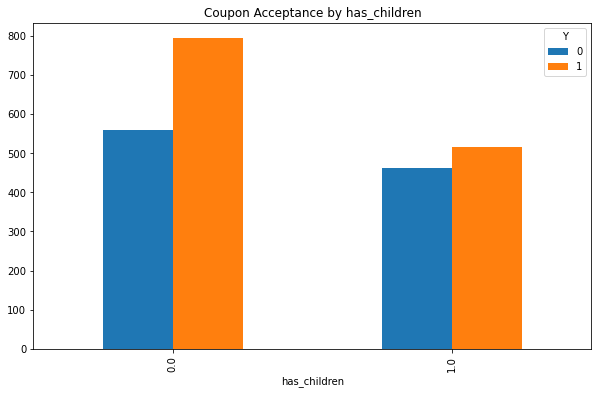

In [408]:
has_children_val_xt = pd.crosstab(df['has_children'], df['Y'])
has_children_val_xt.plot(kind = 'bar', title='Coupon Acceptance by has_children')

In [409]:
df.has_children.value_counts()

0.0    1353
1.0     979
Name: has_children, dtype: int64

Since the majority of instances for has_children is '0' we assign the missing values in has_children to 0.

In [410]:
df['has_children'].replace(np.NaN, 0, inplace = True)

Bar

<AxesSubplot:title={'center':'Coupon Acceptance by Bar'}, xlabel='Bar'>

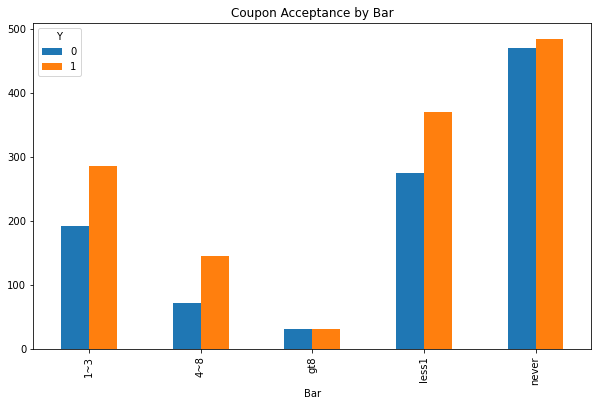

In [411]:
Bar_val_xt = pd.crosstab(df['Bar'], df['Y'])
Bar_val_xt.plot(kind = 'bar', title='Coupon Acceptance by Bar')

In [412]:
df.Bar.value_counts()

never    955
less1    645
1~3      478
4~8      217
gt8       63
Name: Bar, dtype: int64

Since the majority of instances for Bar is "never" we assign the missing values in Bar to 'never'.

In [413]:
df['Bar'].replace(np.NaN, 'never', inplace = True)

CoffeeHouse

<AxesSubplot:title={'center':'Coupon Acceptance by CoffeeHouse'}, xlabel='CoffeeHouse'>

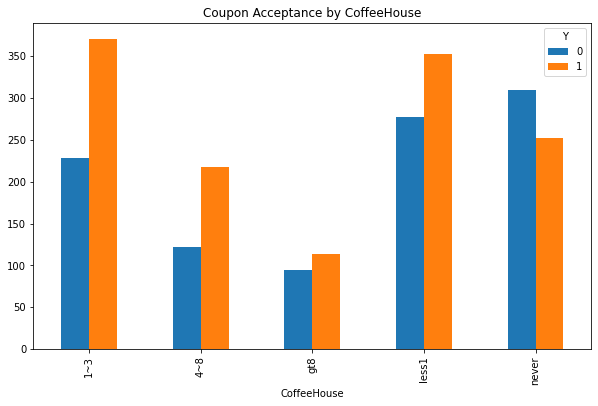

In [414]:
CoffeeHouse_val_xt = pd.crosstab(df['CoffeeHouse'], df['Y'])
CoffeeHouse_val_xt.plot(kind = 'bar', title='Coupon Acceptance by CoffeeHouse')

In [415]:
df.CoffeeHouse.value_counts()

less1    629
1~3      599
never    562
4~8      339
gt8      209
Name: CoffeeHouse, dtype: int64

Since the majority of instances for CoffeeHouse is "less1" we assign the missing values in CoffeeHouse to 'less1'.

In [416]:
df['CoffeeHouse'].replace(np.NaN, 'less1', inplace = True)

CarryAway

<AxesSubplot:title={'center':'Coupon Acceptance by CarryAway'}, xlabel='CarryAway'>

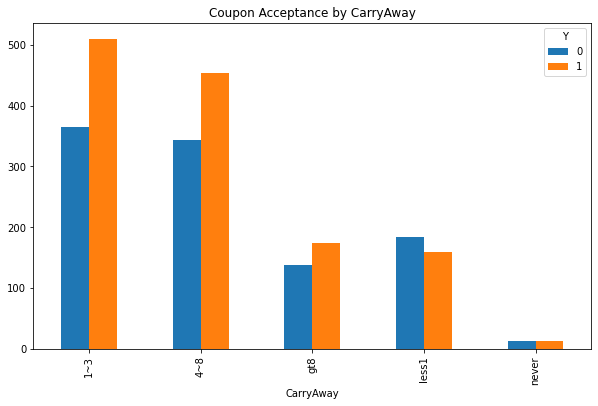

In [417]:
CarryAway_val_xt = pd.crosstab(df['CarryAway'], df['Y'])
CarryAway_val_xt.plot(kind = 'bar', title='Coupon Acceptance by CarryAway')

In [418]:
df.CarryAway.value_counts()

1~3      875
4~8      797
less1    343
gt8      313
never     27
Name: CarryAway, dtype: int64

Since the majority of instances have CarryAway as '1 ~ 3' we assign the missing values in CarryAway to '1~3'.

In [419]:
df['CarryAway'].replace(np.NaN, '1~3', inplace = True)

RestaurantLessThan20

<AxesSubplot:title={'center':'Coupon Acceptance by RestaurantLessThan20'}, xlabel='RestaurantLessThan20'>

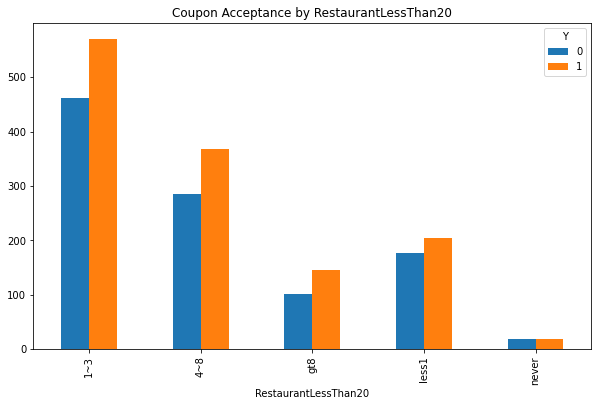

In [420]:
RestaurantLessThan20_val_xt = pd.crosstab(df['RestaurantLessThan20'], df['Y'])
RestaurantLessThan20_val_xt.plot(kind = 'bar', title='Coupon Acceptance by RestaurantLessThan20')

In [421]:
df.RestaurantLessThan20.value_counts()

1~3      1032
4~8       653
less1     382
gt8       248
never      37
Name: RestaurantLessThan20, dtype: int64

Since the majority of instances have RestaurantLessThan20 as "1~ 3" we assign the missing values in RestaurantLessThan20 to '1~3'.

In [422]:
df['RestaurantLessThan20'].replace(np.NaN, '1', inplace = True)

Restaurant20To50

<AxesSubplot:title={'center':'Coupon Acceptance by Restaurant20To50'}, xlabel='Restaurant20To50'>

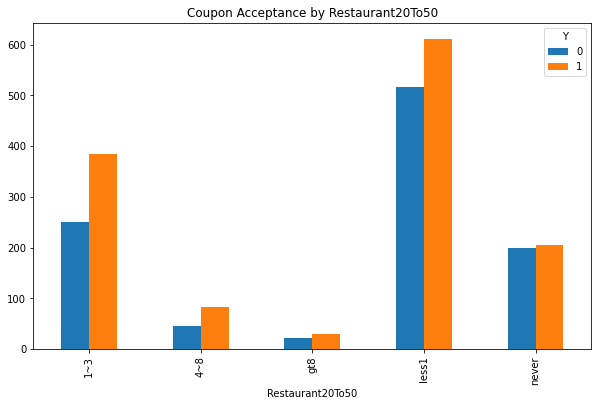

In [423]:
Restaurant20To50_val_xt = pd.crosstab(df['Restaurant20To50'], df['Y'])
Restaurant20To50_val_xt.plot(kind = 'bar', title='Coupon Acceptance by Restaurant20To50')

In [424]:
df.Restaurant20To50.value_counts()

less1    1129
1~3       636
never     404
4~8       129
gt8        53
Name: Restaurant20To50, dtype: int64

Since the majority of instances have Restaurant20To50 as "less1" we assign the missing values in Restaurant20To50 to 'less1'.

In [425]:
df['Restaurant20To50'].replace(np.NaN, 'less1', inplace = True)

In [426]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

#### Handling Categorical values

We replace the column **destination** with dummy variables and dropping redundant column to avoid multicollinearity

In [427]:
cols = pd.get_dummies(df['destination'], prefix= 'destination', drop_first=True)
df[cols.columns] = cols
df.drop('destination', axis = 1, inplace = True)

We replace the column **passanger** with dummy variables and dropping redundant column to avoid multicollinearity

In [428]:
cols = pd.get_dummies(df['passanger'], prefix= 'passanger', drop_first=True)
df[cols.columns] = cols
df.drop('passanger', axis = 1, inplace = True)

We replace the column **weather** with dummy variables and dropping redundant column to avoid multicollinearity

In [429]:
cols = pd.get_dummies(df['weather'], prefix= 'weather', drop_first=True)
df[cols.columns] = cols
df.drop('weather', axis = 1, inplace = True)

We replace the column **temperature** with dummy variables and dropping redundant column to avoid multicollinearity

In [430]:
cols = pd.get_dummies(df['temperature'], prefix= 'temperature', drop_first=True)
df[cols.columns] = cols
df.drop('temperature', axis = 1, inplace = True)

We replace the column **time** with dummy variables and dropping redundant column to avoid multicollinearity

In [431]:
cols = pd.get_dummies(df['time'], prefix= 'time', drop_first=True)
df[cols.columns] = cols
df.drop('time', axis = 1, inplace = True)

We replace the column **coupon** with dummy variables and dropping redundant column to avoid multicollinearity

In [432]:
cols = pd.get_dummies(df['coupon'], prefix= 'coupon', drop_first=True)
df[cols.columns] = cols
df.drop('coupon', axis = 1, inplace = True)

We replace the column **expiration** with dummy variables and dropping redundant column to avoid multicollinearity

In [433]:
cols = pd.get_dummies(df['expiration'], prefix= 'expiration', drop_first=True)
df[cols.columns] = cols
df.drop('expiration', axis = 1, inplace = True)

We replace the column **gender** with dummy variables and dropping redundant column to avoid multicollinearity

In [434]:
cols = pd.get_dummies(df['gender'], prefix= 'gender', drop_first=True)
df[cols.columns] = cols
df.drop('gender', axis = 1, inplace = True)

We replace the column **age** with dummy variables and dropping redundant column to avoid multicollinearity

In [435]:
cols = pd.get_dummies(df['age'], prefix= 'age', drop_first=True)
df[cols.columns] = cols
df.drop('age', axis = 1, inplace = True)

We replace the column **maritalStatus** with dummy variables and dropping redundant column to avoid multicollinearity

In [436]:
cols = pd.get_dummies(df['maritalStatus'], prefix= 'maritalStatus', drop_first=True)
df[cols.columns] = cols
df.drop('maritalStatus', axis = 1, inplace = True)

We replace the column **has_children** with dummy variables and dropping redundant column to avoid multicollinearity

In [437]:
cols = pd.get_dummies(df['has_children'], prefix= 'has_children', drop_first=True)
df[cols.columns] = cols
df.drop('has_children', axis = 1, inplace = True)

We replace the column **education** with dummy variables and dropping redundant column to avoid multicollinearity

In [438]:
cols = pd.get_dummies(df['education'], prefix= 'education', drop_first=True)
df[cols.columns] = cols
df.drop('education', axis = 1, inplace = True)

We replace the column **occupation** with dummy variables and dropping redundant column to avoid multicollinearity

In [439]:
cols = pd.get_dummies(df['occupation'], prefix= 'occupation', drop_first=True)
df[cols.columns] = cols
df.drop('occupation', axis = 1, inplace = True)

We replace the column **income** with dummy variables and dropping redundant column to avoid multicollinearity

In [440]:
cols = pd.get_dummies(df['income'], prefix= 'income', drop_first=True)
df[cols.columns] = cols
df.drop('income', axis = 1, inplace = True)

We replace the column **Bar** with dummy variables and dropping redundant column to avoid multicollinearity

In [441]:
cols = pd.get_dummies(df['Bar'], prefix= 'Bar', drop_first=True)
df[cols.columns] = cols
df.drop('Bar', axis = 1, inplace = True)

We replace the column **CoffeeHouse** with dummy variables and dropping redundant column to avoid multicollinearity

In [442]:
cols = pd.get_dummies(df['CoffeeHouse'], prefix= 'CoffeeHouse', drop_first=True)
df[cols.columns] = cols
df.drop('CoffeeHouse', axis = 1, inplace = True)

We replace the column **CarryAway** with dummy variables and dropping redundant column to avoid multicollinearity

In [443]:
cols = pd.get_dummies(df['CarryAway'], prefix= 'CarryAway', drop_first=True)
df[cols.columns] = cols
df.drop('CarryAway', axis = 1, inplace = True)

We replace the column **RestaurantLessThan20** with dummy variables and dropping redundant column to avoid multicollinearity

In [444]:
cols = pd.get_dummies(df['RestaurantLessThan20'], prefix= 'RestaurantLessThan20', drop_first=True)
df[cols.columns] = cols
df.drop('RestaurantLessThan20', axis = 1, inplace = True)

We replace the column **Restaurant20To50** with dummy variables and dropping redundant column to avoid multicollinearity

In [445]:
cols = pd.get_dummies(df['Restaurant20To50'], prefix= 'Restaurant20To50', drop_first=True)
df[cols.columns] = cols
df.drop('Restaurant20To50', axis = 1, inplace = True)

We replace the column **toCoupon_GEQ5min** with dummy variables and dropping redundant column to avoid multicollinearity

In [446]:
cols = pd.get_dummies(df['toCoupon_GEQ5min'], prefix= 'toCoupon_GEQ5min', drop_first=True)
df[cols.columns] = cols
df.drop('toCoupon_GEQ5min', axis = 1, inplace = True)

We replace the column **toCoupon_GEQ15min** with dummy variables and dropping redundant column to avoid multicollinearity

In [447]:
cols = pd.get_dummies(df['toCoupon_GEQ15min'], prefix= 'toCoupon_GEQ15min', drop_first=True)
df[cols.columns] = cols
df.drop('toCoupon_GEQ15min', axis = 1, inplace = True)

We replace the column **toCoupon_GEQ25min** with dummy variables and dropping redundant column to avoid multicollinearity

In [448]:
cols = pd.get_dummies(df['toCoupon_GEQ25min'], prefix= 'toCoupon_GEQ25min', drop_first=True)
df[cols.columns] = cols
df.drop('toCoupon_GEQ25min', axis = 1, inplace = True)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   direction_same                                        2378 non-null   int64
 1   Y                                                     2378 non-null   int64
 2   destination_No Urgent Place                           2378 non-null   uint8
 3   destination_Work                                      2378 non-null   uint8
 4   passanger_Friend(s)                                   2378 non-null   uint8
 5   passanger_Kid(s)                                      2378 non-null   uint8
 6   passanger_Partner                                     2378 non-null   uint8
 7   weather_Snowy                                         2378 non-null   uint8
 8   weather_Sunny                                         2378 non-null   uint8
 9

#### Features and Target variables

In [450]:
X = df.drop('Y', axis=1)
y = df['Y']

In [451]:
y.value_counts()

1    1329
0    1049
Name: Y, dtype: int64

The target variable is balanced

#### Splitting Data

Splitting df(train.csv) data into train and test(valid set) sets

In [452]:
from sklearn.model_selection import train_test_split

# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


print("Size of training set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 1664   size of test set: 714



In [455]:
X_train_cols = X_train.columns

#### Scaling

In [456]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing ``test.csv`` 

Read data

In [457]:
test = pd.read_csv("test.csv")
test.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Friend(s),Sunny,80.0,10PM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,less1,never,1,1,0,0,1
1,No Urgent Place,Friend(s),Sunny,55.0,2PM,Coffee House,2h,Male,21,Single,...,1~3,less1,1~3,1~3,less1,1,0,0,0,1
2,No Urgent Place,Kid(s),Snowy,30.0,6PM,Bar,1d,Female,50plus,Married partner,...,1~3,4~8,NaN,4~8,4~8,1,1,0,0,1
3,No Urgent Place,Partner,Sunny,999.0,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,1~3,1~3,1~3,1~3,1~3,1,0,0,0,1
4,Home,Alone,Snowy,30.0,10PM,Restaurant(<20),2h,Female,50plus,Single,...,never,1~3,less1,1~3,less1,1,1,1,0,1


Viewing datatype of each feature

In [458]:
test.dtypes

destination              object
passanger                object
weather                  object
temperature             float64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children            float64
education                object
occupation               object
income                   object
car                      object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
dtype: object

Get basic information about the dataframe

In [459]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           793 non-null    object 
 1   passanger             793 non-null    object 
 2   weather               779 non-null    object 
 3   temperature           780 non-null    float64
 4   time                  793 non-null    object 
 5   coupon                793 non-null    object 
 6   expiration            793 non-null    object 
 7   gender                779 non-null    object 
 8   age                   781 non-null    object 
 9   maritalStatus         793 non-null    object 
 10  has_children          777 non-null    float64
 11  education             793 non-null    object 
 12  occupation            793 non-null    object 
 13  income                793 non-null    object 
 14  car                   9 non-null      object 
 15  Bar                   7

#### Dropping unwanted features

Dropping feature 'car' 

In [460]:
test = test.drop('car', axis=1)

Dropping feature 'direction_opp' 

In [461]:
test = test.drop('direction_opp', axis=1)

#### Imputing missing values

In [462]:
test.isna().sum()

destination              0
passanger                0
weather                 14
temperature             13
time                     0
coupon                   0
expiration               0
gender                  14
age                     12
maritalStatus            0
has_children            16
education                0
occupation               0
income                   0
Bar                      9
CoffeeHouse             16
CarryAway               13
RestaurantLessThan20     8
Restaurant20To50        13
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
dtype: int64

Weather

In [463]:
test.weather.value_counts()

Sunny    614
Snowy     94
Rainy     71
Name: weather, dtype: int64

Since the majority of instances have weather 'Sunny' we assign the missing values in job to 'Sunny'.

In [464]:
test['weather'].replace(np.NaN, 'Sunny',inplace = True)

Temperature

In [465]:
test.temperature.value_counts()

80.0     390
55.0     223
30.0     144
999.0     23
Name: temperature, dtype: int64

Temperature cannot be 999. Hence we convert into null.

In [466]:
test['temperature'].replace(999, np.NaN, inplace = True)

In [467]:
test.temperature.value_counts()

80.0    390
55.0    223
30.0    144
Name: temperature, dtype: int64

Since the majority of instances have temperature 80 we assign the missing values in temperature to 80.

In [468]:
test['temperature'].replace(np.NaN, 80, inplace = True)

Gender

In [469]:
test.gender.value_counts()

Female    391
Male      388
Name: gender, dtype: int64

Since the majority of instances have gender "Female" we assign the missing values in gender to 'Female'.

In [470]:
test['gender'].replace(np.NaN, 'Female', inplace = True)

Age

In [471]:
test.age.value_counts()

21         162
26         150
31         112
50plus     111
36         101
41          75
46          37
below21     33
Name: age, dtype: int64

Since the majority of instances for age is 21 we assign the missing values in age to 21.

In [472]:
test['age'].replace(np.NaN, 21, inplace = True)

Has Children

In [473]:
test.has_children.value_counts()

0.0    437
1.0    340
Name: has_children, dtype: int64

Since the majority of instances for has_children is '0' we assign the missing values in has_children to 0.

In [474]:
test['has_children'].replace(np.NaN, 0, inplace = True)

Bar

In [475]:
test.Bar.value_counts()

never    310
less1    243
1~3      160
4~8       56
gt8       15
Name: Bar, dtype: int64

Since the majority of instances for Bar is "never" we assign the missing values in Bar to 'never'.

In [476]:
test['Bar'].replace(np.NaN, 'never', inplace = True)

CoffeeHouse

In [477]:
test.CoffeeHouse.value_counts()

less1    209
never    188
1~3      181
4~8      122
gt8       77
Name: CoffeeHouse, dtype: int64

Since the majority of instances for CoffeeHouse is "less1" we assign the missing values in CoffeeHouse to 'less1'.

In [478]:
test['CoffeeHouse'].replace(np.NaN, 'less1', inplace = True)

CarryAway

In [479]:
test.CarryAway.value_counts()

1~3      289
4~8      254
less1    134
gt8       98
never      5
Name: CarryAway, dtype: int64

Since the majority of instances have CarryAway as '1 ~ 3' we assign the missing values in CarryAway to '1~3'.

In [480]:
test['CarryAway'].replace(np.NaN, '1~3', inplace = True)

RestaurantLessThan20

In [481]:
test.RestaurantLessThan20.value_counts()

1~3      334
4~8      221
less1    146
gt8       69
never     15
Name: RestaurantLessThan20, dtype: int64

Since the majority of instances have RestaurantLessThan20 as "1~ 3" we assign the missing values in RestaurantLessThan20 to '1~3'.

In [482]:
test['RestaurantLessThan20'].replace(np.NaN, '1', inplace = True)

Restaurant20To50

In [483]:
test.Restaurant20To50.value_counts()

less1    381
1~3      186
never    152
4~8       45
gt8       16
Name: Restaurant20To50, dtype: int64

Since the majority of instances have Restaurant20To50 as "less1" we assign the missing values in Restaurant20To50 to 'less1'.

In [484]:
test['Restaurant20To50'].replace(np.NaN, 'less1', inplace = True)

In [485]:
test.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
dtype: int64

#### Handling Categorical values

We replace the column **destination** with dummy variables and dropping redundant column to avoid multicollinearity

In [486]:
cols = pd.get_dummies(test['destination'], prefix= 'destination', drop_first=True)
test[cols.columns] = cols
test.drop('destination', axis = 1, inplace = True)

We replace the column **passanger** with dummy variables and dropping redundant column to avoid multicollinearity

In [487]:
cols = pd.get_dummies(test['passanger'], prefix= 'passanger', drop_first=True)
test[cols.columns] = cols
test.drop('passanger', axis = 1, inplace = True)

We replace the column **weather** with dummy variables and dropping redundant column to avoid multicollinearity

In [488]:
cols = pd.get_dummies(test['weather'], prefix= 'weather', drop_first=True)
test[cols.columns] = cols
test.drop('weather', axis = 1, inplace = True)

We replace the column **temperature** with dummy variables and dropping redundant column to avoid multicollinearity

In [489]:
cols = pd.get_dummies(test['temperature'], prefix= 'temperature', drop_first=True)
test[cols.columns] = cols
test.drop('temperature', axis = 1, inplace = True)

We replace the column **time** with dummy variables and dropping redundant column to avoid multicollinearity

In [490]:
cols = pd.get_dummies(test['time'], prefix= 'time', drop_first=True)
test[cols.columns] = cols
test.drop('time', axis = 1, inplace = True)

We replace the column **coupon** with dummy variables and dropping redundant column to avoid multicollinearity

In [491]:
cols = pd.get_dummies(test['coupon'], prefix= 'coupon', drop_first=True)
test[cols.columns] = cols
test.drop('coupon', axis = 1, inplace = True)

We replace the column **expiration** with dummy variables and dropping redundant column to avoid multicollinearity

In [492]:
cols = pd.get_dummies(test['expiration'], prefix= 'expiration', drop_first=True)
test[cols.columns] = cols
test.drop('expiration', axis = 1, inplace = True)

We replace the column **gender** with dummy variables and dropping redundant column to avoid multicollinearity

In [493]:
cols = pd.get_dummies(test['gender'], prefix= 'gender', drop_first=True)
test[cols.columns] = cols
test.drop('gender', axis = 1, inplace = True)

We replace the column **age** with dummy variables and dropping redundant column to avoid multicollinearity

In [494]:
cols = pd.get_dummies(test['age'], prefix= 'age', drop_first=True)
test[cols.columns] = cols
test.drop('age', axis = 1, inplace = True)

We replace the column **maritalStatus** with dummy variables and dropping redundant column to avoid multicollinearity

In [495]:
cols = pd.get_dummies(test['maritalStatus'], prefix= 'maritalStatus', drop_first=True)
test[cols.columns] = cols
test.drop('maritalStatus', axis = 1, inplace = True)

We replace the column **has_children** with dummy variables and dropping redundant column to avoid multicollinearity

In [496]:
cols = pd.get_dummies(test['has_children'], prefix= 'has_children', drop_first=True)
test[cols.columns] = cols
test.drop('has_children', axis = 1, inplace = True)

We replace the column **education** with dummy variables and dropping redundant column to avoid multicollinearity

In [497]:
cols = pd.get_dummies(test['education'], prefix= 'education', drop_first=True)
test[cols.columns] = cols
test.drop('education', axis = 1, inplace = True)

We replace the column **occupation** with dummy variables and dropping redundant column to avoid multicollinearity

In [498]:
cols = pd.get_dummies(test['occupation'], prefix= 'occupation', drop_first=True)
test[cols.columns] = cols
test.drop('occupation', axis = 1, inplace = True)

We replace the column **income** with dummy variables and dropping redundant column to avoid multicollinearity

In [499]:
cols = pd.get_dummies(test['income'], prefix= 'income', drop_first=True)
test[cols.columns] = cols
test.drop('income', axis = 1, inplace = True)

We replace the column **Bar** with dummy variables and dropping redundant column to avoid multicollinearity

In [500]:
cols = pd.get_dummies(test['Bar'], prefix= 'Bar', drop_first=True)
test[cols.columns] = cols
test.drop('Bar', axis = 1, inplace = True)

We replace the column **CoffeeHouse** with dummy variables and dropping redundant column to avoid multicollinearity

In [501]:
cols = pd.get_dummies(test['CoffeeHouse'], prefix= 'CoffeeHouse', drop_first=True)
test[cols.columns] = cols
test.drop('CoffeeHouse', axis = 1, inplace = True)

We replace the column **CarryAway** with dummy variables and dropping redundant column to avoid multicollinearity

In [502]:
cols = pd.get_dummies(test['CarryAway'], prefix= 'CarryAway', drop_first=True)
test[cols.columns] = cols
test.drop('CarryAway', axis = 1, inplace = True)

We replace the column **RestaurantLessThan20** with dummy variables and dropping redundant column to avoid multicollinearity

In [503]:
cols = pd.get_dummies(test['RestaurantLessThan20'], prefix= 'RestaurantLessThan20', drop_first=True)
test[cols.columns] = cols
test.drop('RestaurantLessThan20', axis = 1, inplace = True)

We replace the column **Restaurant20To50** with dummy variables and dropping redundant column to avoid multicollinearity

In [504]:
cols = pd.get_dummies(test['Restaurant20To50'], prefix= 'Restaurant20To50', drop_first=True)
test[cols.columns] = cols
test.drop('Restaurant20To50', axis = 1, inplace = True)

We replace the column **toCoupon_GEQ5min** with dummy variables and dropping redundant column to avoid multicollinearity

In [505]:
cols = pd.get_dummies(test['toCoupon_GEQ5min'], prefix= 'toCoupon_GEQ5min', drop_first=True)
test[cols.columns] = cols
test.drop('toCoupon_GEQ5min', axis = 1, inplace = True)

We replace the column **toCoupon_GEQ15min** with dummy variables and dropping redundant column to avoid multicollinearity

In [506]:
cols = pd.get_dummies(test['toCoupon_GEQ15min'], prefix= 'toCoupon_GEQ15min', drop_first=True)
test[cols.columns] = cols
test.drop('toCoupon_GEQ15min', axis = 1, inplace = True)

We replace the column **toCoupon_GEQ25min** with dummy variables and dropping redundant column to avoid multicollinearity

In [507]:
cols = pd.get_dummies(test['toCoupon_GEQ25min'], prefix= 'toCoupon_GEQ25min', drop_first=True)
test[cols.columns] = cols
test.drop('toCoupon_GEQ25min', axis = 1, inplace = True)

In [508]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 93 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   direction_same                                        793 non-null    int64
 1   destination_No Urgent Place                           793 non-null    uint8
 2   destination_Work                                      793 non-null    uint8
 3   passanger_Friend(s)                                   793 non-null    uint8
 4   passanger_Kid(s)                                      793 non-null    uint8
 5   passanger_Partner                                     793 non-null    uint8
 6   weather_Snowy                                         793 non-null    uint8
 7   weather_Sunny                                         793 non-null    uint8
 8   temperature_55.0                                      793 non-null    uint8
 9  

#### Scaling

In [509]:
test = scaler.transform(test)

# Machine learning models 

### Evaluation Strategy

Using 'recall' as the metric to evaluate the models, hence minimizing false negative.

In [697]:
from sklearn.metrics import recall_score

#### Dummy Classifier

In [700]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

train_pred_most_frequent = dummy_majority.predict(X_train)
test_pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))

print('Train score: {:.4f}'.format(recall_score(train_pred_most_frequent, y_train)))
print('Test score: {:.4f}'.format(recall_score(test_pred_most_frequent, y_test)))

Unique predicted labels: [1]
Train score: 0.5583
Test score: 0.5602


#### K Neighbors Classifier

Hyperparameter Tuning

In [556]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'n_neighbors': [*range(1,20)]}

# Re-run with smaller n_neighbors set 
param_grid = {'n_neighbors': [4,11,19,24],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights':['uniform','distance']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [4, 11, 19, 24], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}


In [557]:
from sklearn.neighbors import KNeighborsClassifier

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring = 'recall', n_jobs= -1, verbose = 4)

In [558]:
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.9s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [4, 11, 19, 24],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall', verbose=4)

In [559]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'algorithm': 'brute', 'n_neighbors': 24, 'weights': 'distance'}
Best cross-validation score: 0.81


In [560]:
# convert to DataFrame
results_knn = pd.DataFrame(grid_search_knn.cv_results_)
# show the first 5 rows
display(results_knn.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030464,0.003697,0.070827,0.003716,auto,4,uniform,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh...",0.526882,0.543011,...,0.538256,0.029679,29,0.698520,0.670256,0.662180,0.660834,0.672043,0.672767,0.013598
1,0.030895,0.006063,0.065829,0.006960,auto,4,distance,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh...",0.709677,0.682796,...,0.681372,0.021425,25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.031308,0.001204,0.084987,0.009461,auto,11,uniform,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig...",0.752688,0.817204,...,0.752427,0.036429,15,0.807537,0.814266,0.784657,0.831763,0.825269,0.812698,0.016352
3,0.028372,0.006421,0.065284,0.004040,auto,11,distance,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig...",0.736559,0.817204,...,0.751351,0.035195,19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.029532,0.006752,0.084305,0.010943,auto,19,uniform,"{'algorithm': 'auto', 'n_neighbors': 19, 'weig...",0.790323,0.827957,...,0.783638,0.030861,7,0.829071,0.842530,0.794078,0.835801,0.830645,0.826425,0.016843


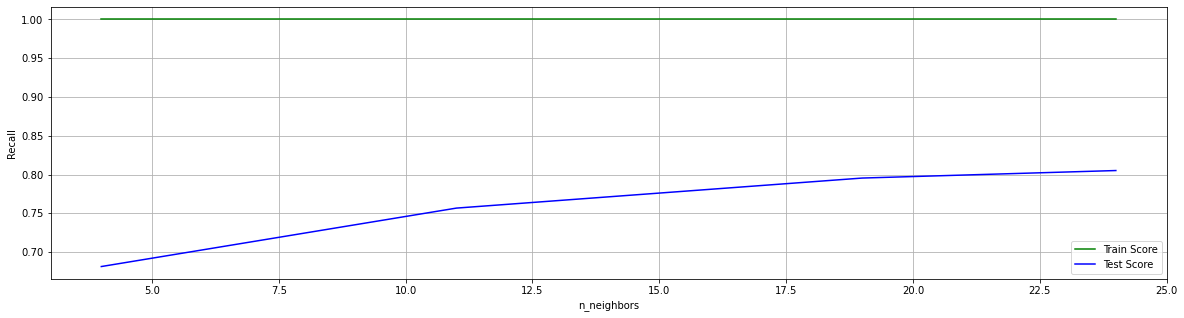

In [563]:
x_axis = np.array([4,11,19,24])
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, np.array(results_knn[(results_knn['param_algorithm']=='brute')&(results_knn['param_weights']=='distance')].mean_train_score), label = 'Train Score', c = 'g')
plt.plot(x_axis, np.array(results_knn[(results_knn['param_algorithm']=='brute')&(results_knn['param_weights']=='distance')].mean_test_score), label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Recall')
plt.grid()
plt.legend()

In [564]:
print('Train score: {:.4f}'.format(grid_search_knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_knn.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.8000


In [565]:
pred_knn = grid_search_knn.predict(X_test)

Model Evaluation

In [566]:
from sklearn.metrics import confusion_matrix

confusion_knn = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion_knn))

Confusion matrix:
[[141 173]
 [ 80 320]]


In [567]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.64      0.45      0.53       314
    Coupon Accepted       0.65      0.80      0.72       400

           accuracy                           0.65       714
          macro avg       0.64      0.62      0.62       714
       weighted avg       0.64      0.65      0.63       714



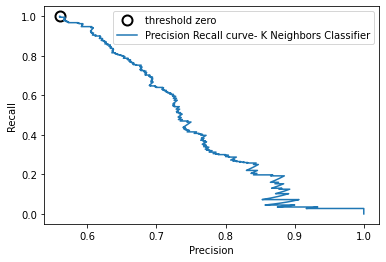

In [568]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, grid_search_knn.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))

plt.plot(precision_knn[close_zero], recall_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_knn, recall_knn, label="Precision Recall curve- K Neighbors Classifier")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

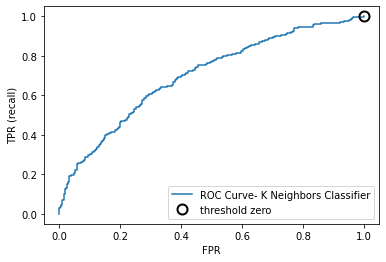

In [569]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, grid_search_knn.predict_proba(X_test)[:, 1])

plt.plot(fpr_knn, tpr_knn, label="ROC Curve- K Neighbors Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))
plt.plot(fpr_knn[close_zero], tpr_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Logistic Regression

Hyperparameter Tuning

In [570]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty': ['l1','l2'],
              'solver':['saga', 'newton-cg', 'lbfgs', 'liblinear']}
             
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['saga', 'newton-cg', 'lbfgs', 'liblinear']}


In [571]:
from sklearn.linear_model import LogisticRegression

grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, return_train_score=True, scoring= 'recall', n_jobs= -1, verbose = 4)


In [572]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall', verbose=4)

In [573]:
print("Best parameters: {}".format(grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logreg.best_score_))

Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 1.00


In [574]:
# convert to DataFrame
results_logreg = pd.DataFrame(grid_search_logreg.cv_results_)
# show the first 5 rows
display(results_logreg.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005420,0.000917,0.001370,0.000379,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
1,0.001627,0.000487,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001426,0.000496,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.004427,0.001346,0.009447,0.015421,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.0,0.0,...,0.0,0.0,42,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.039483,0.015766,0.001516,0.000448,0.001,l2,saga,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}",1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,0.997312,0.999462,0.001075


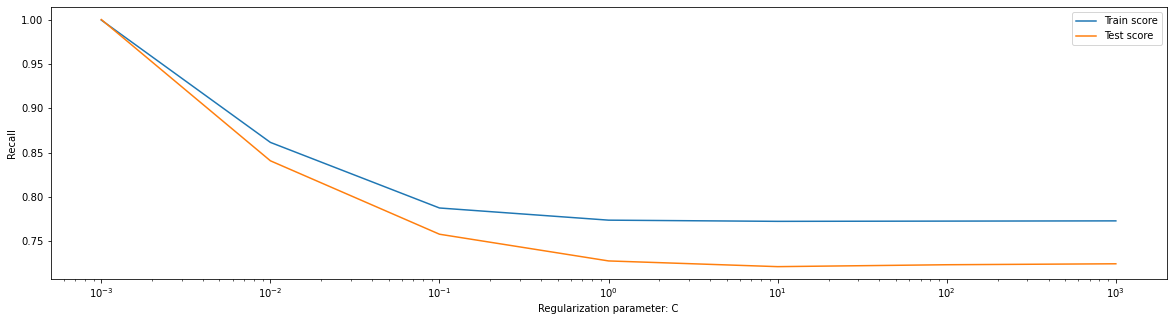

In [575]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_logreg[(results_logreg['param_penalty']=='l2')&(results_logreg['param_solver']=='saga')].mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_logreg[(results_logreg['param_penalty']=='l2')&(results_logreg['param_solver']=='saga')].mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Recall')
plt.xscale('log')

In [576]:
print('Train score: {:.4f}'.format(grid_search_logreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_logreg.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [577]:
pred_logreg = grid_search_logreg.predict(X_test)

Model Evaluation

In [578]:
from sklearn.metrics import confusion_matrix

confusion_logreg = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion_logreg))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [580]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



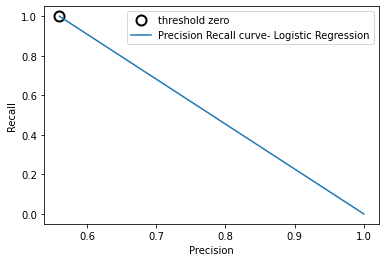

In [581]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))

plt.plot(precision_logreg[close_zero], recall_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_logreg, recall_logreg, label="Precision Recall curve- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

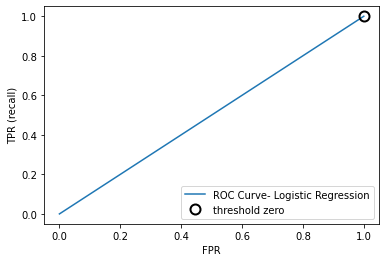

In [582]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])

plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))
plt.plot(fpr_logreg[close_zero], tpr_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Linear SVC

Hyperparameter Tuning

In [583]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'loss':['hinge','squared_hinge'], 
              'penalty':['l1','l2']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge'], 'penalty': ['l1', 'l2']}


In [584]:
from sklearn.svm import LinearSVC

grid_search_linsvc = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True, scoring= 'recall', n_jobs= -1, verbose = 4)


In [585]:
grid_search_linsvc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall', verbose=4)

In [586]:
print("Best parameters: {}".format(grid_search_linsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linsvc.best_score_))

Best parameters: {'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation score: 1.00


In [587]:
# convert to DataFrame
results_linsvc = pd.DataFrame(grid_search_linsvc.cv_results_)
# show the first 5 rows
display(results_linsvc.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002334,0.000405,0.000000,0.000000,0.001,hinge,l1,"{'C': 0.001, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003268,0.000996,0.001180,0.000285,0.001,hinge,l2,"{'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'}",1.000000,1.00000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001845,0.000432,0.000000,0.000000,0.001,squared_hinge,l1,"{'C': 0.001, 'loss': 'squared_hinge', 'penalty...",NaN,NaN,...,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003502,0.000681,0.000599,0.000489,0.001,squared_hinge,l2,"{'C': 0.001, 'loss': 'squared_hinge', 'penalty...",0.854839,0.88172,...,0.846039,0.027542,2,0.869448,0.864065,0.858681,0.862719,0.858871,0.862757,0.003955
4,0.001918,0.000518,0.000000,0.000000,0.01,hinge,l1,"{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


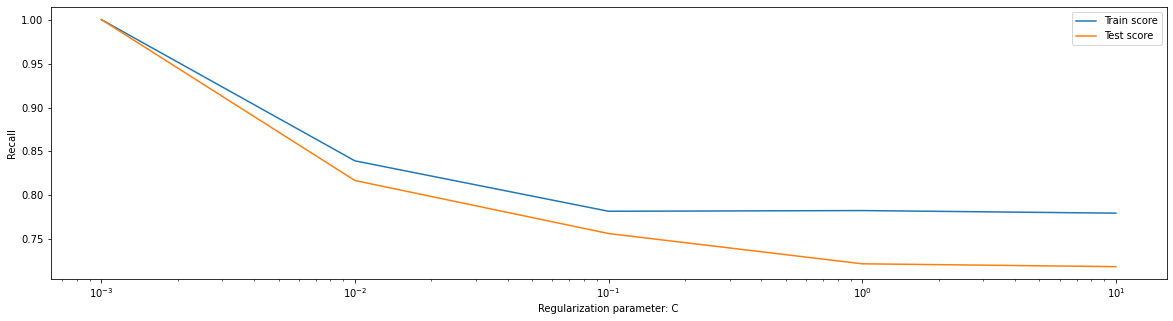

In [591]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_linsvc[(results_linsvc['param_loss']=='hinge')&(results_linsvc['param_penalty']=='l2')].mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_linsvc[(results_linsvc['param_loss']=='hinge')&(results_linsvc['param_penalty']=='l2')].mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Recall')
plt.xscale('log')

In [592]:
print('Train score: {:.4f}'.format(grid_search_linsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_linsvc.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [593]:
pred_linsvc = grid_search_linsvc.predict(X_test)

Model Evaluation

In [594]:
from sklearn.metrics import confusion_matrix

confusion_linsvc = confusion_matrix(y_test, pred_linsvc)
print("Confusion matrix:\n{}".format(confusion_linsvc))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [595]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_linsvc, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


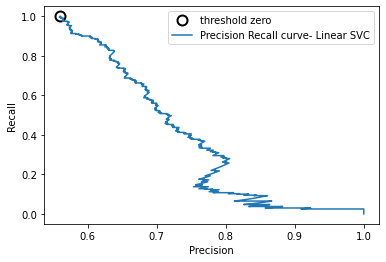

In [596]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_linsvc, recall_linsvc, thresholds_linsvc = precision_recall_curve(y_test, grid_search_linsvc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))

plt.plot(precision_linsvc[close_zero], recall_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_linsvc, recall_linsvc, label="Precision Recall curve- Linear SVC")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

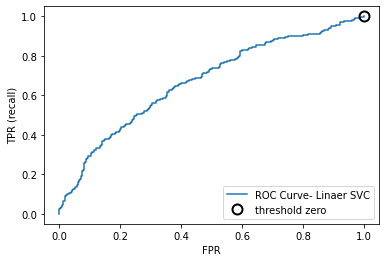

In [597]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_linsvc, tpr_linsvc, thresholds_linsvc = roc_curve(y_test, grid_search_linsvc.decision_function(X_test))

plt.plot(fpr_linsvc, tpr_linsvc, label="ROC Curve- Linaer SVC")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))
plt.plot(fpr_linsvc[close_zero], tpr_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### SVC(kernel = 'linear')

Hyperparameter Tuning

In [256]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [257]:
from sklearn.svm import SVC

grid_search_ksvclin = GridSearchCV(SVC(kernel = 'linear', cache_size =14000), param_grid, cv=2, return_train_score=True, scoring= 'recall', n_jobs= -1, verbose = 4)

In [258]:
grid_search_ksvclin.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    1.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    5.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   41.8s finished


GridSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall', verbose=4)

In [259]:
print("Best parameters: {}".format(grid_search_ksvclin.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvclin.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 1.00


In [260]:
# convert to DataFrame
results_ksvclin = pd.DataFrame(grid_search_ksvclin.cv_results_)
# show the first 5 rows
display(results_ksvclin.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.065551,0.002800,0.053797,0.000154,0.001,{'C': 0.001},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
1,0.058401,0.004748,0.053882,0.002114,0.01,{'C': 0.01},0.911828,0.806034,0.858931,0.052897,2,0.907328,0.855914,0.881621,0.025707
2,0.136458,0.002510,0.051035,0.003480,0.1,{'C': 0.1},0.756989,0.726293,0.741641,0.015348,3,0.806034,0.802151,0.804093,0.001942
3,0.462117,0.057892,0.036098,0.001023,1,{'C': 1},0.726882,0.693966,0.710424,0.016458,5,0.760776,0.815054,0.787915,0.027139
4,3.908235,0.774723,0.027177,0.000729,10,{'C': 10},0.724731,0.698276,0.711504,0.013228,4,0.756466,0.806452,0.781459,0.024993


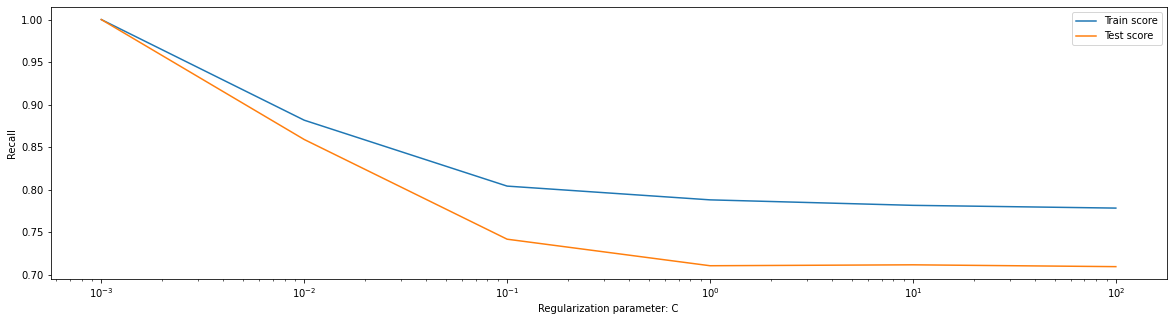

In [261]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Recall')
plt.xscale('log')

In [262]:
print('Train score: {:.4f}'.format(grid_search_ksvclin.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_ksvclin.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [263]:
pred_ksvclin = grid_search_ksvclin.predict(X_test)

Model Evaluation

In [264]:
from sklearn.metrics import confusion_matrix

confusion_ksvclin = confusion_matrix(y_test, pred_ksvclin)
print("Confusion matrix:\n{}".format(confusion_ksvclin))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [267]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvclin, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



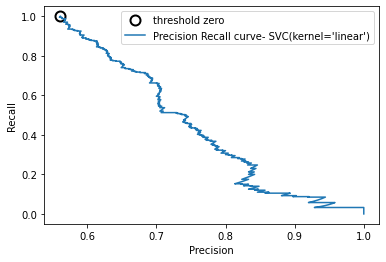

In [269]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvclin, recall_ksvclin, thresholds_ksvclin = precision_recall_curve(y_test, grid_search_ksvclin.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))

plt.plot(precision_ksvclin[close_zero], recall_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvclin, recall_ksvclin, label="Precision Recall curve- SVC(kernel='linear')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

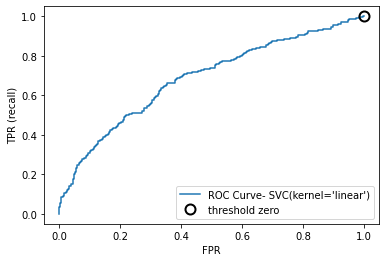

In [270]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvclin, tpr_ksvclin, thresholds_ksvclin = roc_curve(y_test, grid_search_ksvclin.decision_function(X_test))

plt.plot(fpr_ksvclin, tpr_ksvclin, label="ROC Curve- SVC(kernel='linear')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))
plt.plot(fpr_ksvclin[close_zero], tpr_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### SVC(kernel = 'poly')

Hyperparameter Tuning

In [271]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [272]:
from sklearn.svm import SVC

random_search_ksvcpoly = RandomizedSearchCV(SVC(kernel= 'poly', degree=3, cache_size= 14000), param_grid, cv= 2, scoring ='recall', return_train_score=True, n_jobs= -1, verbose = 4)

In [273]:
random_search_ksvcpoly.fit(X_train, y_train)

C:\Users\neema\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    1.9s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.4s finished


RandomizedSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='poly'),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   return_train_score=True, scoring='recall', verbose=4)

In [274]:
print("Best parameters: {}".format(random_search_ksvcpoly.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search_ksvcpoly.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 1.00


In [275]:
# convert to DataFrame
results_ksvcpoly = pd.DataFrame(random_search_ksvcpoly.cv_results_)
# show the first 5 rows
display(results_ksvcpoly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.072466,0.000060,0.057555,0.000943,0.001,{'C': 0.001},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
1,0.078706,0.002587,0.059266,0.001333,0.01,{'C': 0.01},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
2,0.102159,0.004415,0.065559,0.000278,0.1,{'C': 0.1},0.989247,0.965517,0.977382,0.011865,3,0.997845,0.987097,0.992471,0.005374
3,0.242260,0.016231,0.054238,0.003319,1,{'C': 1},0.739785,0.711207,0.725496,0.014289,4,0.978448,0.967742,0.973095,0.005353
4,0.379603,0.012629,0.042529,0.001769,10,{'C': 10},0.718280,0.640086,0.679183,0.039097,5,1.000000,1.000000,1.000000,0.000000


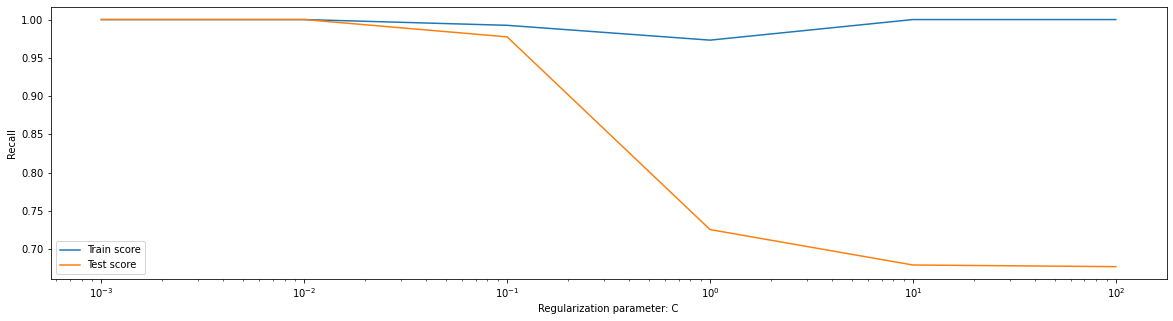

In [276]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Recall')
plt.xscale('log')

In [277]:
print('Train score: {:.4f}'.format(random_search_ksvcpoly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(random_search_ksvcpoly.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [278]:
pred_ksvcpoly = random_search_ksvcpoly.predict(X_test)

Model Evaluation

In [279]:
from sklearn.metrics import confusion_matrix

confusion_ksvcpoly = confusion_matrix(y_test, pred_ksvcpoly)
print("Confusion matrix:\n{}".format(confusion_ksvcpoly))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [280]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcpoly, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


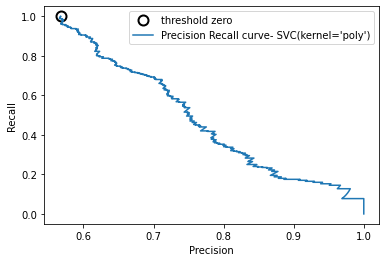

In [281]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcpoly, recall_ksvcpoly, thresholds_ksvcpoly = precision_recall_curve(y_test, random_search_ksvcpoly.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))

plt.plot(precision_ksvcpoly[close_zero], recall_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcpoly, recall_ksvcpoly, label="Precision Recall curve- SVC(kernel='poly')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

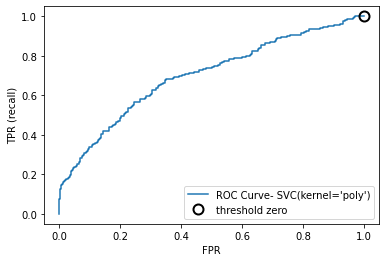

In [282]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcpoly, tpr_ksvcpoly, thresholds_ksvcpoly = roc_curve(y_test, random_search_ksvcpoly.decision_function(X_test))

plt.plot(fpr_ksvcpoly, tpr_ksvcpoly, label="ROC Curve- SVC(kernel='poly')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))
plt.plot(fpr_ksvcpoly[close_zero], tpr_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### SVC(kernel = 'rbf')

Hyperparameter Tuning

In [283]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [284]:
from sklearn.svm import SVC

grid_search_ksvcrbf = GridSearchCV(SVC(kernel = 'rbf', cache_size =14000), param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)

In [285]:
grid_search_ksvcrbf.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    5.7s finished


GridSearchCV(cv=2, estimator=SVC(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall', verbose=4)

In [286]:
print("Best parameters: {}".format(grid_search_ksvcrbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvcrbf.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 1.00


In [287]:
# convert to DataFrame
results_ksvcrbf = pd.DataFrame(grid_search_ksvcrbf.cv_results_)
# show the first 5 rows
display(results_ksvcrbf.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.078936,0.009539,0.062569,0.000395,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
1,0.083961,0.005299,0.072107,0.007569,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
2,0.079287,0.010501,0.074515,0.006346,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
3,0.081403,0.007607,0.068289,0.004283,0.001,1,"{'C': 0.001, 'gamma': 1}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
4,0.088874,0.007531,0.080199,0.010068,0.001,10,"{'C': 0.001, 'gamma': 10}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0


In [288]:
print('Train score: {:.4f}'.format(grid_search_ksvcrbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_ksvcrbf.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [289]:
pred_ksvcrbf = grid_search_ksvcrbf.predict(X_test)

Model Evaluation

In [290]:
from sklearn.metrics import confusion_matrix

confusion_ksvcrbf = confusion_matrix(y_test, pred_ksvcrbf)
print("Confusion matrix:\n{}".format(confusion_ksvcrbf))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [291]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcrbf, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


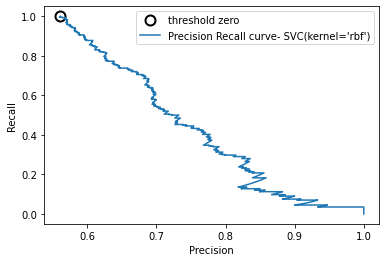

In [292]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcrbf, recall_ksvcrbf, thresholds_ksvcrbf = precision_recall_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))

plt.plot(precision_ksvcrbf[close_zero], recall_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcrbf, recall_ksvcrbf, label="Precision Recall curve- SVC(kernel='rbf')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

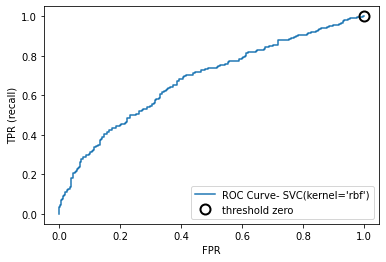

In [293]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcrbf, tpr_ksvcrbf, thresholds_ksvcrbf = roc_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))

plt.plot(fpr_ksvcrbf, tpr_ksvcrbf, label="ROC Curve- SVC(kernel='rbf')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))
plt.plot(fpr_ksvcrbf[close_zero], tpr_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Decision Tree Classifier

Hyperparameter Tuning

In [598]:
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": range(1,10),
           "min_samples_split": range(2,10),
           "max_leaf_nodes": range(2,6),
           "criterion":['gini','entropy'],
           "splitter":['best','random']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'max_leaf_nodes': range(2, 6), 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}


In [599]:
from sklearn.tree import DecisionTreeClassifier

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5,scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)

In [600]:
grid_search_dtree.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:    8.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='recall', verbose=4)

In [601]:
print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.96


In [602]:
# convert to DataFrame
results_dtree = pd.DataFrame(grid_search_dtree.cv_results_)
# show the first 5 rows
display(results_dtree.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_split,param_splitter,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005090,0.000907,0.001219,0.000390,gini,1,2,2,best,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.958919,0.082162,1,1.0,1.0,1.0,1.0,0.850806,0.970161,0.059677
1,0.003062,0.001740,0.001104,0.000794,gini,1,2,2,random,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.958919,0.082162,1,1.0,1.0,1.0,1.0,0.850806,0.970161,0.059677
2,0.004210,0.000379,0.001354,0.000383,gini,1,2,3,best,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.958919,0.082162,1,1.0,1.0,1.0,1.0,0.850806,0.970161,0.059677
3,0.003890,0.000763,0.001718,0.000623,gini,1,2,3,random,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.958919,0.082162,1,1.0,1.0,1.0,1.0,0.850806,0.970161,0.059677
4,0.004104,0.000335,0.000920,0.000217,gini,1,2,4,best,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.958919,0.082162,1,1.0,1.0,1.0,1.0,0.850806,0.970161,0.059677


In [603]:
print('Train score: {:.4f}'.format(grid_search_dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [604]:
dtree = DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

[Text(226.28892857142858, 201.90857142857143, 'X[14] <= 0.5\nentropy = 0.99\nsamples = 1664\nvalue = [735, 929]'),
 Text(144.08357142857142, 170.84571428571428, 'X[17] <= 0.5\nentropy = 0.999\nsamples = 1354\nvalue = [651, 703]'),
 Text(76.52571428571429, 139.78285714285715, 'X[77] <= 0.5\nentropy = 0.995\nsamples = 998\nvalue = [539, 459]'),
 Text(38.26285714285714, 108.72, 'X[3] <= 0.5\nentropy = 0.999\nsamples = 756\nvalue = [362, 394]'),
 Text(19.13142857142857, 77.65714285714284, 'X[18] <= 0.5\nentropy = 0.999\nsamples = 583\nvalue = [304, 279]'),
 Text(9.565714285714286, 46.59428571428572, 'X[15] <= 0.5\nentropy = 0.996\nsamples = 369\nvalue = [170, 199]'),
 Text(4.782857142857143, 15.531428571428563, 'entropy = 0.997\nsamples = 251\nvalue = [133, 118]'),
 Text(14.348571428571429, 15.531428571428563, 'entropy = 0.897\nsamples = 118\nvalue = [37, 81]'),
 Text(28.697142857142858, 46.59428571428572, 'X[32] <= 0.5\nentropy = 0.954\nsamples = 214\nvalue = [134, 80]'),
 Text(23.9142857

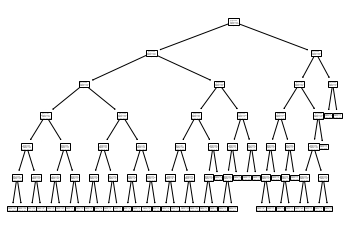

In [605]:
from sklearn import tree
tree.plot_tree(dtree)

In [606]:
pred_dtree = grid_search_dtree.predict(X_test)

Model Evaluation

In [607]:
from sklearn.metrics import confusion_matrix

confusion_dtree = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion_dtree))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [608]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


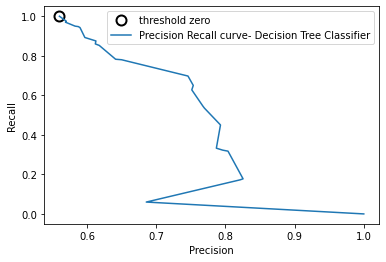

In [609]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_dtree, recall_dtree, thresholds_dtree = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))

plt.plot(precision_dtree[close_zero], recall_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_dtree, recall_dtree, label="Precision Recall curve- Decision Tree Classifier")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

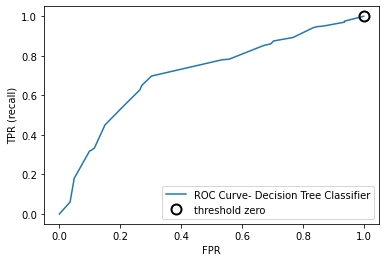

In [610]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

plt.plot(fpr_dtree, tpr_dtree, label="ROC Curve- Decision Tree Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))
plt.plot(fpr_dtree[close_zero], tpr_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Voting Classifier - Hard

In [611]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [613]:
log_clf = LogisticRegression(C = 0.001, max_iter=500, penalty='l1', solver='saga', n_jobs =-1, verbose = 4 )
log_clf.fit(X_train, y_train)

convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.001, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='saga', verbose=4)

In [614]:
knn_clf = KNeighborsClassifier(n_neighbors = 24, algorithm= 'brute', weights='distance', n_jobs =-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=24,
                     weights='distance')

In [615]:
svm_clf = SVC(C = 0.001, gamma = 0.001, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
svm_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=0.001, cache_size=14000, gamma=0.001, probability=True, verbose=4)

In [616]:
voting_hard = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard',n_jobs =-1, verbose = 4)
voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001, max_iter=500,
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga', verbose=4)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                                   n_neighbors=24,
                                                   weights='distance')),
                             ('svc',
                              SVC(C=0.001, cache_size=14000, gamma=0.001,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4)

In [617]:
from sklearn.metrics import recall_score

for clf in (log_clf, knn_clf, svm_clf, voting_hard):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

LogisticRegression 1.0
KNeighborsClassifier 0.8
SVC 1.0
VotingClassifier 1.0


In [618]:
pred_voting_hard_train = voting_hard.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_voting_hard_train)))

pred_voting_hard_test = voting_hard.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_voting_hard_test)))

Train score: 1.0000
Test score: 1.0000


Model Evaluation

In [619]:
from sklearn.metrics import confusion_matrix

confusion_voting_hard = confusion_matrix(y_test, pred_voting_hard_test)
print("Confusion matrix:\n{}".format(confusion_voting_hard))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [620]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_hard_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Voting Classifier - Soft

In [621]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [622]:
log_clf = LogisticRegression(C = 0.001, max_iter=500, penalty='l1', solver='saga', n_jobs =-1, verbose = 4 )
log_clf.fit(X_train, y_train)

convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.001, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='saga', verbose=4)

In [623]:
knn_clf = KNeighborsClassifier(n_neighbors = 24, algorithm= 'brute', weights='distance', n_jobs =-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=24,
                     weights='distance')

In [624]:
svm_clf = SVC(C =0.001, gamma = 0.001, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
svm_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=0.001, cache_size=14000, gamma=0.001, probability=True, verbose=4)

In [625]:
voting_soft = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft',n_jobs =-1, verbose = 4)
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001, max_iter=500,
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga', verbose=4)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                                   n_neighbors=24,
                                                   weights='distance')),
                             ('svc',
                              SVC(C=0.001, cache_size=14000, gamma=0.001,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4, voting='soft')

In [626]:
for clf in (log_clf, knn_clf, svm_clf, voting_soft):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

LogisticRegression 1.0
KNeighborsClassifier 0.8
SVC 1.0
VotingClassifier 0.715


In [627]:
pred_voting_soft_train = voting_soft.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_voting_soft_train)))

pred_voting_soft_test = voting_soft.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_voting_soft_test)))

Train score: 1.0000
Test score: 0.7150


Model Evaluation

In [628]:
from sklearn.metrics import confusion_matrix

confusion_voting_soft = confusion_matrix(y_test, pred_voting_soft_test)
print("Confusion matrix:\n{}".format(confusion_voting_soft))

Confusion matrix:
[[179 135]
 [114 286]]


In [629]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_soft_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.61      0.57      0.59       314
    Coupon Accepted       0.68      0.71      0.70       400

           accuracy                           0.65       714
          macro avg       0.65      0.64      0.64       714
       weighted avg       0.65      0.65      0.65       714



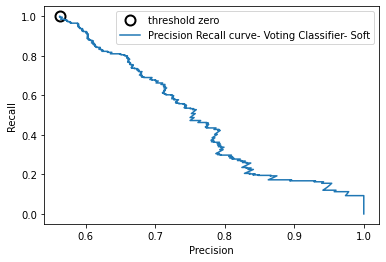

In [630]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_voting_soft, recall_voting_soft, thresholds_voting_soft = precision_recall_curve(y_test, voting_soft.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_voting_soft))

plt.plot(precision_voting_soft[close_zero], recall_voting_soft[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_voting_soft, recall_voting_soft, label="Precision Recall curve- Voting Classifier- Soft")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

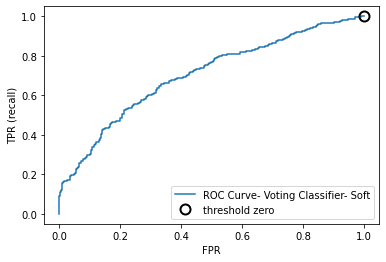

In [631]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_voting_soft, tpr_voting_soft, thresholds_voting_soft = roc_curve(y_test, voting_soft.predict_proba(X_test)[:, 1])

plt.plot(fpr_voting_soft, tpr_voting_soft, label="ROC Curve- Voting Classifier- Soft")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_voting_soft))
plt.plot(fpr_voting_soft[close_zero], tpr_voting_soft[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Bagging -SVM

Hyperparameter Tuning

In [344]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [633]:
param_grid = {'base_estimator__C': [0.001, 0.01, 0.1, 1, 10],
              'base_estimator__gamma': [0.001, 0.01, 0.1, 1, 10],
              'n_estimators': [10,100,500]}

svc_clf = SVC(probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
bag_svc_m = BaggingClassifier(base_estimator=svc_clf, bootstrap=True, n_jobs=-1, random_state=0, verbose =4)
bag_svc = GridSearchCV(bag_svc_m, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
bag_svc.fit(X_train, y_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 41.6min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.4min remaining:  4.2min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.4min remaining:   51.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.5min finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(base_estimator=SVC(cache_size=14000,
                                                            probability=True,
                                                            verbose=4),
                                         n_jobs=-1, random_state=0, verbose=4),
             n_jobs=-1,
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10],
                         'base_estimator__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [10, 100, 500]},
             return_train_score=True, scoring='recall', verbose=4)

In [636]:
print("Best parameters: {}".format(bag_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_svc.best_score_))

Best parameters: {'base_estimator__C': 0.001, 'base_estimator__gamma': 1, 'n_estimators': 500}
Best cross-validation score: 1.00


In [638]:
# convert to DataFrame
results_bag_svc = pd.DataFrame(bag_svc.cv_results_)
# show the first 5 rows
display(results_bag_svc.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__C,param_base_estimator__gamma,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.417699,1.418363,4.024296,0.487583,0.001,0.001,10,"{'base_estimator__C': 0.001, 'base_estimator__...",0.759140,0.700431,0.729785,0.029354,71,0.799569,0.754839,0.777204,0.022365
1,9.786145,0.068969,6.198529,0.074809,0.001,0.001,100,"{'base_estimator__C': 0.001, 'base_estimator__...",0.791398,0.719828,0.755613,0.035785,50,0.803879,0.793548,0.798714,0.005165
2,91.540031,0.590994,30.819292,0.086531,0.001,0.001,500,"{'base_estimator__C': 0.001, 'base_estimator__...",0.810753,0.715517,0.763135,0.047618,44,0.808190,0.791398,0.799794,0.008396
3,3.742938,0.055644,4.357693,0.201217,0.001,0.01,10,"{'base_estimator__C': 0.001, 'base_estimator__...",0.804301,0.711207,0.757754,0.046547,48,0.831897,0.776344,0.804120,0.027776
4,22.782356,0.935265,8.585144,0.000707,0.001,0.01,100,"{'base_estimator__C': 0.001, 'base_estimator__...",0.808602,0.711207,0.759905,0.048698,47,0.825431,0.802151,0.813791,0.011640


In [639]:
pred_bag_svc_train = bag_svc.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_bag_svc_train)))

pred_bag_svc_test = bag_svc.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_bag_svc_test)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   12.2s remaining:   36.7s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   12.7s remaining:    7.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   13.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   13.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Train score: 1.0000


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    6.3s remaining:    3.7s


Test score: 0.9975


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.9s finished


Model Evaluation

In [640]:
from sklearn.metrics import confusion_matrix

confusion_bag_svc = confusion_matrix(y_test, pred_bag_svc_test)
print("Confusion matrix:\n{}".format(confusion_bag_svc))

Confusion matrix:
[[  0 314]
 [  1 399]]


In [641]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_svc_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    6.1s remaining:    3.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.7s finished


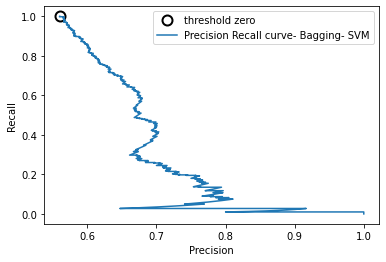

In [642]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_bag_svc, recall_bag_svc, thresholds_bag_svc = precision_recall_curve(y_test, bag_svc.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_svc))

plt.plot(precision_bag_svc[close_zero], recall_bag_svc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_bag_svc, recall_bag_svc, label="Precision Recall curve- Bagging- SVM")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.6s remaining:   16.9s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    6.1s remaining:    3.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.6s finished


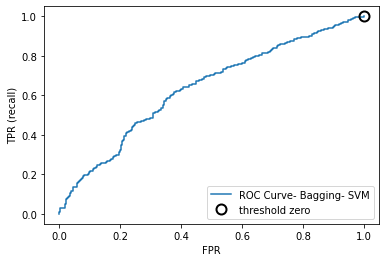

In [643]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_bag_svc, tpr_bag_svc, thresholds_bag_svc = roc_curve(y_test, bag_svc.predict_proba(X_test)[:, 1])

plt.plot(fpr_bag_svc, tpr_bag_svc, label="ROC Curve- Bagging- SVM")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_svc))
plt.plot(fpr_bag_svc[close_zero], tpr_bag_svc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Bagging -Random Forest

Hyperparameter Tuning

In [644]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto'],
              'max_depth' : [2,4,6,8,9],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,3,4,6,8],
              'min_samples_leaf':[1,2,3]}

#max_leaf_nodes=10
bag_rnd_m = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, n_jobs=-1, random_state=0, verbose = 4)
bag_rnd = GridSearchCV(bag_rnd_m, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
bag_rnd.fit(X_train, y_train)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.1s


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500building tree 5 of 500

building tree 6 of 500
building tree 7 of 500building tree 8 of 500
building tree 9 of 500

building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500building tree 16 of 500
building tree 17 of 500

building tree 18 of 500
building tree 19 of 500building tree 20 of 500

building tree 21 of 500
building tree 22 of 500building tree 23 of 500

building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500building tree 28 of 500

building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500building tree 35 of 500
building tree 36 of 500building tree 37 of 500building tree 38 of 500



building tree 39 of 500building tree 40 of 500

building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_leaf_nodes=10,
                                              n_estimators=500, n_jobs=-1,
                                              random_state=0, verbose=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 9], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='recall', verbose=4)

In [645]:
print("Best parameters: {}".format(bag_rnd.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_rnd.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score: 0.97


In [646]:
# convert to DataFrame
results_bag_rnd = pd.DataFrame(bag_rnd.cv_results_)
# show the first 5 rows
display(results_bag_rnd.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.318647,0.001495,0.043210,0.001185,gini,2,auto,1,2,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.969892,0.939655,0.954774,0.015119,39,0.980603,0.954839,0.967721,0.012882
1,0.951433,0.001114,0.094000,0.000498,gini,2,auto,1,2,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.974194,0.950431,0.962312,0.011881,16,0.980603,0.963441,0.972022,0.008581
2,0.342051,0.019642,0.041379,0.001391,gini,2,auto,1,3,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.969892,0.939655,0.954774,0.015119,39,0.980603,0.954839,0.967721,0.012882
3,1.007445,0.045617,0.095454,0.000998,gini,2,auto,1,3,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.974194,0.950431,0.962312,0.011881,16,0.980603,0.963441,0.972022,0.008581
4,0.384060,0.011369,0.052378,0.001195,gini,2,auto,1,4,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.969892,0.939655,0.954774,0.015119,39,0.980603,0.954839,0.967721,0.012882


In [647]:
pred_bag_rnd_train = bag_rnd.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_bag_rnd_train)))

pred_bag_rnd_test = bag_rnd.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_bag_rnd_test)))

Train score: 0.9795
Test score: 0.9675


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [649]:
rndf_b = RandomForestClassifier(max_leaf_nodes=10, criterion= 'entropy', max_depth= 2, max_features='auto', min_samples_leaf= 2, min_samples_split=2, n_estimators= 500, n_jobs=-1, random_state=0, verbose = 4)
rndf_b.fit(X_train,y_train)

pred_rndf_b_train = bag_rnd.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_bag_rnd_train)))

pred_rndf_b_test = bag_rnd.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_bag_rnd_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.1s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500building tree 13 of 500
building tree 14 of 500

building tree 15 of 500
building tree 16 of 500building tree 17 of 500

building tree 18 of 500
building tree 19 of 500
building tree 20 of 500building tree 21 of 500
building tree 22 of 500

building tree 23 of 500
building tree 24 of 500building tree 25 of 500
building tree 26 of 500
building tree 27 of 500

building tree 28 of 500
building tree 29 of 500building tree 30 of 500building tree 31 of 500


building tree 32 of 500
building tree 33 of 500
building tree 34 of 500building tree 35 of 500

building tree 36 of 500building tree 37 of 500building tree 38 of 500


building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500bu

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s


building tree 479 of 500building tree 480 of 500

building tree 481 of 500building tree 482 of 500

building tree 483 of 500building tree 484 of 500

building tree 485 of 500
building tree 486 of 500
building tree 487 of 500building tree 488 of 500

building tree 489 of 500building tree 490 of 500

building tree 491 of 500
building tree 492 of 500
building tree 493 of 500building tree 494 of 500

building tree 495 of 500building tree 496 of 500
building tree 497 of 500

building tree 498 of 500
building tree 499 of 500building tree 500 of 500

Train score: 0.9795
Test score: 0.9675


[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [650]:
for name, score in zip(X_train_cols, rndf_b.feature_importances_):
    print(name, score)

direction_same 0.006784017657735187
destination_No Urgent Place 0.02885461296102348
destination_Work 0.013948594104346006
passanger_Friend(s) 0.06567332615698622
passanger_Kid(s) 0.023862533435596755
passanger_Partner 0.0022184052066438727
weather_Snowy 0.02297565942256964
weather_Sunny 0.08325123799599522
temperature_55.0 0.003636224392927539
temperature_80.0 0.008307889040711093
time_10PM 0.00223832231765347
time_2PM 0.04465664939490664
time_6PM 0.004772829253804408
time_7AM 0.0179360645665471
coupon_Carry out & Take away 0.11272847837190675
coupon_Coffee House 0.03139144249001164
coupon_Restaurant(20-50) 0.023546221875739466
coupon_Restaurant(<20) 0.07042810877417677
expiration_2h 0.03260938830663067
gender_Male 0.001491152075641702
age_21 0.006316844596383846
age_26 0.0034997520254704687
age_31 0.000784481639084243
age_36 0.004976449861852726
age_41 0.00239590093114452
age_46 0.014017601426463204
age_50plus 0.0075053086122741
age_below21 0.001463639909335437
maritalStatus_Married p

([<matplotlib.axis.YTick at 0x21580f74280>,
 [Text(0, 0, 'direction_same'),
  Text(0, 1, 'destination_No Urgent Place'),
  Text(0, 2, 'destination_Work'),
  Text(0, 3, 'passanger_Friend(s)'),
  Text(0, 4, 'passanger_Kid(s)'),
  Text(0, 5, 'passanger_Partner'),
  Text(0, 6, 'weather_Snowy'),
  Text(0, 7, 'weather_Sunny'),
  Text(0, 8, 'temperature_55.0'),
  Text(0, 9, 'temperature_80.0'),
  Text(0, 10, 'time_10PM'),
  Text(0, 11, 'time_2PM'),
  Text(0, 12, 'time_6PM'),
  Text(0, 13, 'time_7AM'),
  Text(0, 14, 'coupon_Carry out & Take away'),
  Text(0, 15, 'coupon_Coffee House'),
  Text(0, 16, 'coupon_Restaurant(20-50)'),
  Text(0, 17, 'coupon_Restaurant(<20)'),
  Text(0, 18, 'expiration_2h'),
  Text(0, 19, 'gender_Male'),
  Text(0, 20, 'age_21'),
  Text(0, 21, 'age_26'),
  Text(0, 22, 'age_31'),
  Text(0, 23, 'age_36'),
  Text(0, 24, 'age_41'),
  Text(0, 25, 'age_46'),
  Text(0, 26, 'age_50plus'),
  Text(0, 27, 'age_below21'),
  Text(0, 28, 'maritalStatus_Married partner'),
  Text(0, 29

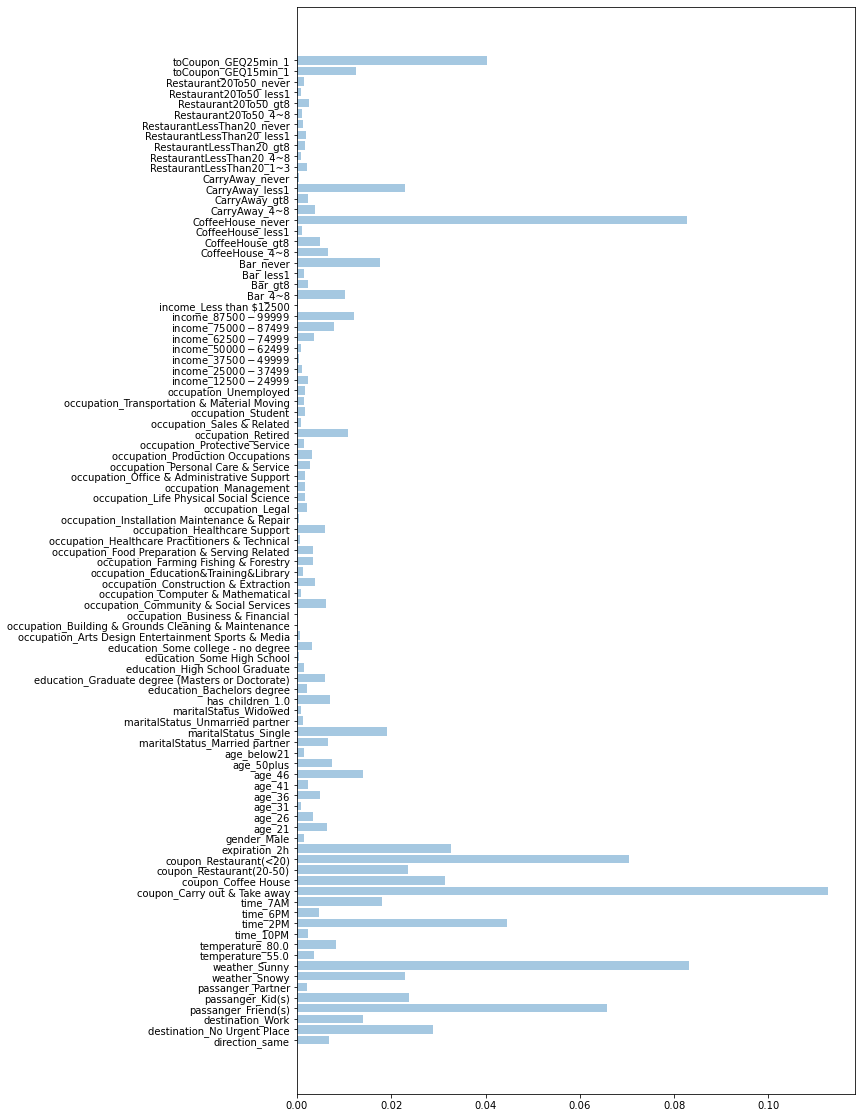

In [652]:
%matplotlib inline

plt.rc('figure', figsize=(10, 20))

y_list = rndf_b.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_cols
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

Model Evaluation

In [653]:
from sklearn.metrics import confusion_matrix

confusion_bag_rnd= confusion_matrix(y_test, pred_bag_rnd_test)
print("Confusion matrix:\n{}".format(confusion_bag_rnd))

Confusion matrix:
[[ 21 293]
 [ 13 387]]


In [654]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_rnd_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.62      0.07      0.12       314
    Coupon Accepted       0.57      0.97      0.72       400

           accuracy                           0.57       714
          macro avg       0.59      0.52      0.42       714
       weighted avg       0.59      0.57      0.45       714



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


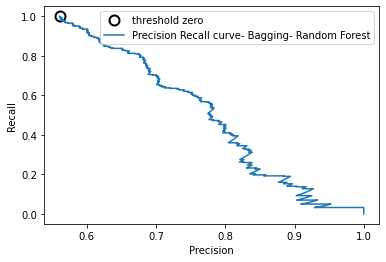

In [655]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_bag_rnd, recall_bag_rnd, thresholds_bag_rnd = precision_recall_curve(y_test, bag_rnd.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_rnd))

plt.plot(precision_bag_rnd[close_zero], recall_bag_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_bag_rnd, recall_bag_rnd, label="Precision Recall curve- Bagging- Random Forest")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


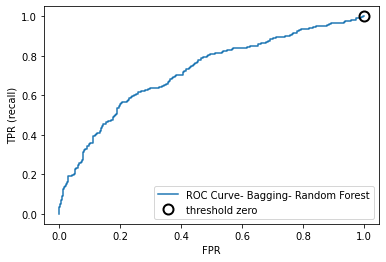

In [656]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_bag_rnd, tpr_bag_rnd, thresholds_bag_rnd = roc_curve(y_test, bag_rnd.predict_proba(X_test)[:, 1])

plt.plot(fpr_bag_rnd, tpr_bag_rnd, label="ROC Curve- Bagging- Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_rnd))
plt.plot(fpr_bag_rnd[close_zero], tpr_bag_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Pasting -Random Forest

Hyperparameter Tuning

In [659]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto'],
              'max_depth' : [2,4,6,8,9],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,3,4,6,8],
              'min_samples_leaf':[1,2,3]}

#max_leaf_nodes=10
pst_rnd_m = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0, verbose = 4, bootstrap=False)
pst_rnd = GridSearchCV(pst_rnd_m, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
pst_rnd.fit(X_train, y_train)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.0s


building tree 1 of 500building tree 2 of 500
building tree 3 of 500
building tree 4 of 500

building tree 5 of 500
building tree 6 of 500building tree 7 of 500

building tree 8 of 500
building tree 9 of 500building tree 10 of 500building tree 11 of 500

building tree 12 of 500

building tree 13 of 500building tree 14 of 500
building tree 15 of 500

building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500building tree 23 of 500

building tree 24 of 500building tree 25 of 500
building tree 26 of 500

building tree 27 of 500building tree 28 of 500

building tree 29 of 500building tree 30 of 500

building tree 31 of 500building tree 32 of 500

building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500building tree 37 of 500building tree 38 of 500


building tree 39 of 500
building tree 40 of 500building tree 41 of 500building tree 42 of 500


b

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(bootstrap=False, n_estimators=500,
                                              n_jobs=-1, random_state=0,
                                              verbose=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 9], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='recall', verbose=4)

In [660]:
print("Best parameters: {}".format(pst_rnd.best_params_))
print("Best cross-validation score: {:.2f}".format(pst_rnd.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score: 0.97


In [661]:
# convert to DataFrame
results_pst_rnd = pd.DataFrame(pst_rnd.cv_results_)
# show the first 5 rows
display(results_pst_rnd.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.233016,0.000497,0.037286,0.000498,gini,2,auto,1,2,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.980645,0.937500,0.959073,0.021573,36,0.978448,0.952688,0.965568,0.012880
1,0.674588,0.002797,0.090348,0.000304,gini,2,auto,1,2,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.980645,0.952586,0.966616,0.014029,16,0.982759,0.961290,0.972024,0.010734
2,0.236844,0.002334,0.039591,0.000810,gini,2,auto,1,3,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.980645,0.937500,0.959073,0.021573,36,0.978448,0.952688,0.965568,0.012880
3,0.707440,0.026071,0.086466,0.002530,gini,2,auto,1,3,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.980645,0.952586,0.966616,0.014029,16,0.982759,0.961290,0.972024,0.010734
4,0.305768,0.012003,0.044712,0.001910,gini,2,auto,1,4,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.980645,0.937500,0.959073,0.021573,36,0.978448,0.952688,0.965568,0.012880


In [662]:
pred_pst_rnd_train = bag_rnd.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_pst_rnd_train)))

pred_pst_rnd_test = pst_rnd.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_pst_rnd_test)))

Train score: 0.9795
Test score: 0.9675


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [664]:
rndf_p = RandomForestClassifier(max_leaf_nodes=10, criterion= 'entropy', max_depth= 2, max_features='auto', min_samples_leaf= 2, min_samples_split=2, n_estimators= 500, n_jobs=-1, random_state=0, verbose = 4)
rndf_p.fit(X_train,y_train)

pred_rndf_p_train = bag_rnd.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_bag_rnd_train)))

pred_rndf_p_test = bag_rnd.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_bag_rnd_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.1s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500building tree 13 of 500
building tree 14 of 500

building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500building tree 20 of 500

building tree 21 of 500building tree 22 of 500

building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500building tree 29 of 500

building tree 30 of 500building tree 31 of 500building tree 32 of 500


building tree 33 of 500
building tree 34 of 500building tree 35 of 500
building tree 36 of 500

building tree 37 of 500
building tree 38 of 500building tree 39 of 500

building tree 40 of 500building tree 41 of 500

building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s


building tree 474 of 500
building tree 475 of 500building tree 476 of 500

building tree 477 of 500
building tree 478 of 500
building tree 479 of 500building tree 480 of 500

building tree 481 of 500
building tree 482 of 500
building tree 483 of 500building tree 484 of 500building tree 485 of 500


building tree 486 of 500building tree 487 of 500

building tree 488 of 500building tree 489 of 500building tree 490 of 500


building tree 491 of 500building tree 492 of 500

building tree 493 of 500building tree 494 of 500

building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500
Train score: 0.9795
Test score: 0.9675


[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [665]:
for name, score in zip(X_train_cols, rndf_p.feature_importances_):
    print(name, score)

direction_same 0.006784017657735187
destination_No Urgent Place 0.02885461296102348
destination_Work 0.013948594104346006
passanger_Friend(s) 0.06567332615698622
passanger_Kid(s) 0.023862533435596755
passanger_Partner 0.0022184052066438727
weather_Snowy 0.02297565942256964
weather_Sunny 0.08325123799599522
temperature_55.0 0.003636224392927539
temperature_80.0 0.008307889040711093
time_10PM 0.00223832231765347
time_2PM 0.04465664939490664
time_6PM 0.004772829253804408
time_7AM 0.0179360645665471
coupon_Carry out & Take away 0.11272847837190675
coupon_Coffee House 0.03139144249001164
coupon_Restaurant(20-50) 0.023546221875739466
coupon_Restaurant(<20) 0.07042810877417677
expiration_2h 0.03260938830663067
gender_Male 0.001491152075641702
age_21 0.006316844596383846
age_26 0.0034997520254704687
age_31 0.000784481639084243
age_36 0.004976449861852726
age_41 0.00239590093114452
age_46 0.014017601426463204
age_50plus 0.0075053086122741
age_below21 0.001463639909335437
maritalStatus_Married p

([<matplotlib.axis.YTick at 0x2158508b070>,
 [Text(0, 0, 'direction_same'),
  Text(0, 1, 'destination_No Urgent Place'),
  Text(0, 2, 'destination_Work'),
  Text(0, 3, 'passanger_Friend(s)'),
  Text(0, 4, 'passanger_Kid(s)'),
  Text(0, 5, 'passanger_Partner'),
  Text(0, 6, 'weather_Snowy'),
  Text(0, 7, 'weather_Sunny'),
  Text(0, 8, 'temperature_55.0'),
  Text(0, 9, 'temperature_80.0'),
  Text(0, 10, 'time_10PM'),
  Text(0, 11, 'time_2PM'),
  Text(0, 12, 'time_6PM'),
  Text(0, 13, 'time_7AM'),
  Text(0, 14, 'coupon_Carry out & Take away'),
  Text(0, 15, 'coupon_Coffee House'),
  Text(0, 16, 'coupon_Restaurant(20-50)'),
  Text(0, 17, 'coupon_Restaurant(<20)'),
  Text(0, 18, 'expiration_2h'),
  Text(0, 19, 'gender_Male'),
  Text(0, 20, 'age_21'),
  Text(0, 21, 'age_26'),
  Text(0, 22, 'age_31'),
  Text(0, 23, 'age_36'),
  Text(0, 24, 'age_41'),
  Text(0, 25, 'age_46'),
  Text(0, 26, 'age_50plus'),
  Text(0, 27, 'age_below21'),
  Text(0, 28, 'maritalStatus_Married partner'),
  Text(0, 29

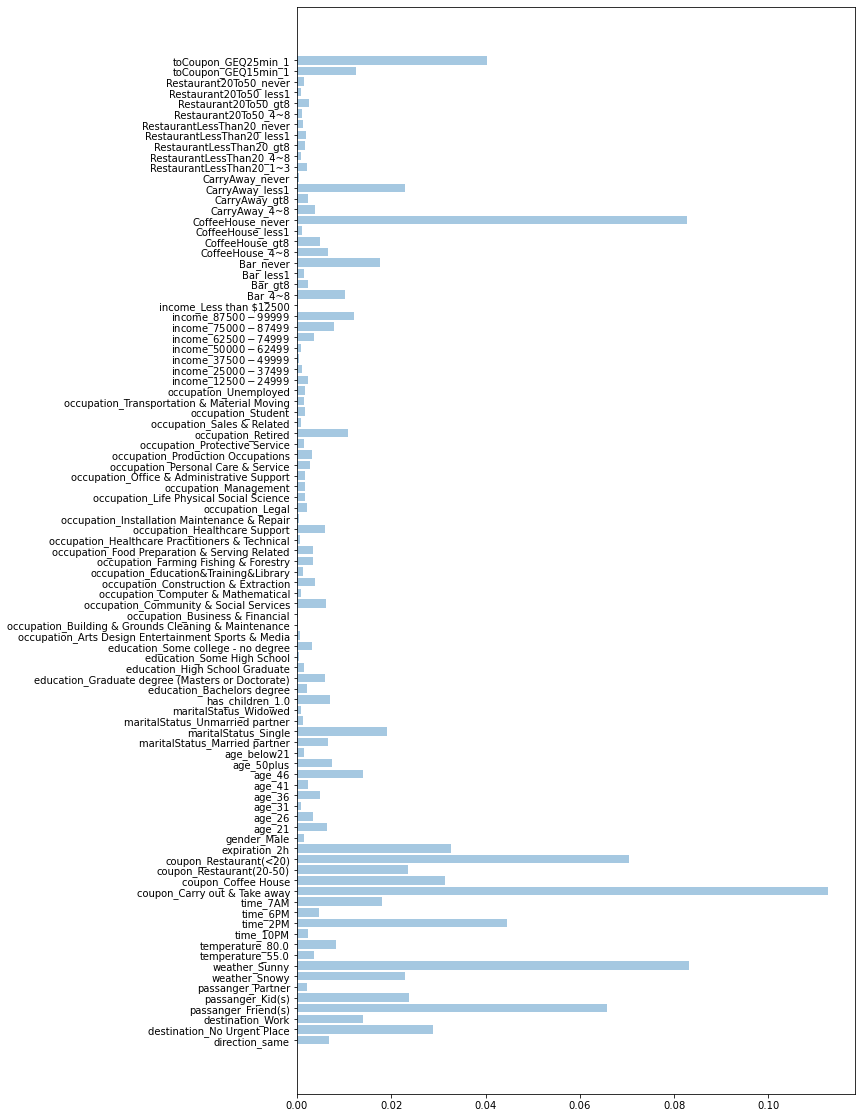

In [666]:
%matplotlib inline

plt.rc('figure', figsize=(10, 20))

y_list = rndf_p.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_cols
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

Model Evaluation

In [667]:
from sklearn.metrics import confusion_matrix

confusion_pst_rnd= confusion_matrix(y_test, pred_pst_rnd_test)
print("Confusion matrix:\n{}".format(confusion_pst_rnd))

Confusion matrix:
[[ 24 290]
 [ 13 387]]


In [668]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_pst_rnd_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.65      0.08      0.14       314
    Coupon Accepted       0.57      0.97      0.72       400

           accuracy                           0.58       714
          macro avg       0.61      0.52      0.43       714
       weighted avg       0.61      0.58      0.46       714



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished


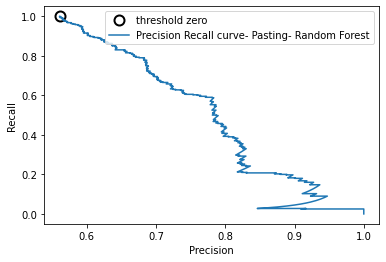

In [669]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_pst_rnd, recall_pst_rnd, thresholds_pst_rnd = precision_recall_curve(y_test, pst_rnd.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_rnd))

plt.plot(precision_pst_rnd[close_zero], recall_pst_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_pst_rnd, recall_pst_rnd, label="Precision Recall curve- Pasting- Random Forest")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


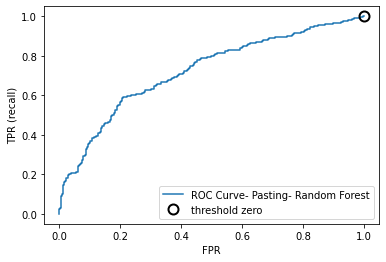

In [670]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_pst_rnd, tpr_pst_rnd, thresholds_pst_rnd = roc_curve(y_test, pst_rnd.predict_proba(X_test)[:, 1])

plt.plot(fpr_pst_rnd, tpr_pst_rnd, label="ROC Curve- Pasting- Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_rnd))
plt.plot(fpr_pst_rnd[close_zero], tpr_pst_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### AdaBoost - Logistic Regression

Hyperparameter Tuning

In [672]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'base_estimator__C': [0.001, 0.01, 0.1, 1], 
              'base_estimator__penalty': ['l1','l2'],
              'base_estimator__solver':['saga', 'newton-cg', 'lbfgs', 'liblinear'],
              'algorithm':['SAMME','SAMME.R'],
              'n_estimators':[100,200]}

log_clf = LogisticRegression(max_iter=500, n_jobs =-1, verbose = 4 )

ada_log_m = AdaBoostClassifier(base_estimator=log_clf, learning_rate=0.5, random_state=0)
ada_log = GridSearchCV(ada_log_m, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
ada_log.fit(X_train, y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  1.1min


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=500,
                                                                            n_jobs=-1,
                                                                            verbose=4),
                                          learning_rate=0.5, random_state=0),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__C': [0.001, 0.01, 0.1, 1],
                         'base_estimator__penalty': ['l1', 'l2'],
                         'base_estimator__solver': ['saga', 'newton-cg',
                                                    'lbfgs', 'liblinear'],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='recall', verbose=4)

In [673]:
print("Best parameters: {}".format(ada_log.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_log.best_score_))

Best parameters: {'algorithm': 'SAMME', 'base_estimator__C': 0.001, 'base_estimator__penalty': 'l1', 'base_estimator__solver': 'saga', 'n_estimators': 100}
Best cross-validation score: 1.00


In [674]:
# convert to DataFrame
results_ada_log = pd.DataFrame(ada_log.cv_results_)
# show the first 5 rows
display(results_ada_log.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator__C,param_base_estimator__penalty,param_base_estimator__solver,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.070531,0.010592,0.002491,0.000498,SAMME,0.001,l1,saga,100,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
1,0.059695,0.009484,0.002495,0.000502,SAMME,0.001,l1,saga,200,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
2,0.002460,0.000036,0.000000,0.000000,SAMME,0.001,l1,newton-cg,100,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN
3,0.002580,0.000096,0.000000,0.000000,SAMME,0.001,l1,newton-cg,200,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN
4,0.002882,0.000206,0.000000,0.000000,SAMME,0.001,l1,lbfgs,100,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",NaN,NaN,NaN,NaN,96,NaN,NaN,NaN,NaN


In [675]:
pred_ada_log_train = ada_log.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_ada_log_train)))

pred_ada_log_test = ada_log.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_ada_log_test)))

Train score: 1.0000
Test score: 1.0000


Model Evaluation

In [676]:
from sklearn.metrics import confusion_matrix

confusion_ada_log= confusion_matrix(y_test, pred_ada_log_test)
print("Confusion matrix:\n{}".format(confusion_ada_log))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [677]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada_log_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


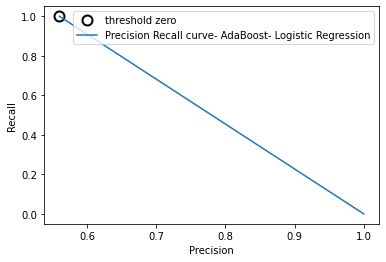

In [678]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ada_log, recall_ada_log, thresholds_ada_log = precision_recall_curve(y_test, ada_log.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_log))

plt.plot(precision_ada_log[close_zero], recall_ada_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ada_log, recall_ada_log, label="Precision Recall curve- AdaBoost- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

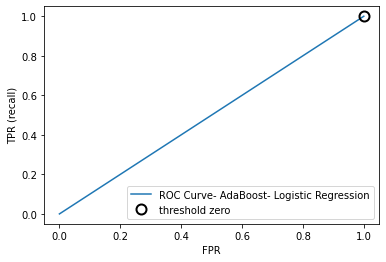

In [679]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ada_log, tpr_ada_log, thresholds_ada_log = roc_curve(y_test, ada_log.predict_proba(X_test)[:, 1])

plt.plot(fpr_ada_log, tpr_ada_log, label="ROC Curve- AdaBoost- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_log))
plt.plot(fpr_ada_log[close_zero], tpr_ada_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### Gradient Boosting 

Hyperparameter Tuning

In [681]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'min_samples_split':[2,3],
              'subsample':[0.6,0.8,1],
              'min_samples_leaf':[1,2],
              'max_depth' : [2,3,7],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2]}


gboost_m = GradientBoostingClassifier(random_state=0)
gboost =  GridSearchCV(gboost_m, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)    
gboost.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   21.2s finished


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2], 'max_depth': [2, 3, 7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150],
                         'subsample': [0.6, 0.8, 1]},
             return_train_score=True, scoring='recall', verbose=4)

In [682]:
print("Best parameters: {}".format(gboost.best_params_))
print("Best cross-validation score: {:.2f}".format(gboost.best_score_))

Best parameters: {'learning_rate': 2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 1}
Best cross-validation score: 0.78


In [683]:
# convert to DataFrame
results_gboost = pd.DataFrame(gboost.cv_results_)
# show the first 5 rows
display(results_gboost.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.161129,0.035495,0.003182,1.921654e-04,0.5,2,1,2,100,0.6,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.664516,0.689655,0.677086,0.012570,70,0.862069,0.881720,0.871895,0.009826
1,0.190229,0.000501,0.003189,4.979372e-04,0.5,2,1,2,100,0.8,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.703226,0.687500,0.695363,0.007863,34,0.905172,0.922581,0.913877,0.008704
2,0.155203,0.009834,0.002491,4.984140e-04,0.5,2,1,2,100,1,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.711828,0.681034,0.696431,0.015397,31,0.913793,0.929032,0.921413,0.007620
3,0.221479,0.011332,0.002990,2.384186e-07,0.5,2,1,2,150,0.6,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.683871,0.696121,0.689996,0.006125,37,0.890086,0.926882,0.908484,0.018398
4,0.223783,0.004042,0.003988,9.969473e-04,0.5,2,1,2,150,0.8,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.677419,0.689655,0.683537,0.006118,49,0.924569,0.926882,0.925725,0.001156


In [684]:
pred_gboost_train = gboost.predict(X_train)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_gboost_train)))

pred_gboost_test = gboost.predict(X_test)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_gboost_test)))

Train score: 0.8353
Test score: 0.7925


In [686]:
gboost_1 = GradientBoostingClassifier(random_state=0,learning_rate= 2, max_depth= 3, min_samples_leaf= 1, min_samples_split=3, n_estimators=100, subsample= 1)
gboost_1.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=2, min_samples_split=3, random_state=0,
                           subsample=1)

([<matplotlib.axis.YTick at 0x215fc02f580>,
 [Text(0, 0, 'direction_same'),
  Text(0, 1, 'destination_No Urgent Place'),
  Text(0, 2, 'destination_Work'),
  Text(0, 3, 'passanger_Friend(s)'),
  Text(0, 4, 'passanger_Kid(s)'),
  Text(0, 5, 'passanger_Partner'),
  Text(0, 6, 'weather_Snowy'),
  Text(0, 7, 'weather_Sunny'),
  Text(0, 8, 'temperature_55.0'),
  Text(0, 9, 'temperature_80.0'),
  Text(0, 10, 'time_10PM'),
  Text(0, 11, 'time_2PM'),
  Text(0, 12, 'time_6PM'),
  Text(0, 13, 'time_7AM'),
  Text(0, 14, 'coupon_Carry out & Take away'),
  Text(0, 15, 'coupon_Coffee House'),
  Text(0, 16, 'coupon_Restaurant(20-50)'),
  Text(0, 17, 'coupon_Restaurant(<20)'),
  Text(0, 18, 'expiration_2h'),
  Text(0, 19, 'gender_Male'),
  Text(0, 20, 'age_21'),
  Text(0, 21, 'age_26'),
  Text(0, 22, 'age_31'),
  Text(0, 23, 'age_36'),
  Text(0, 24, 'age_41'),
  Text(0, 25, 'age_46'),
  Text(0, 26, 'age_50plus'),
  Text(0, 27, 'age_below21'),
  Text(0, 28, 'maritalStatus_Married partner'),
  Text(0, 29

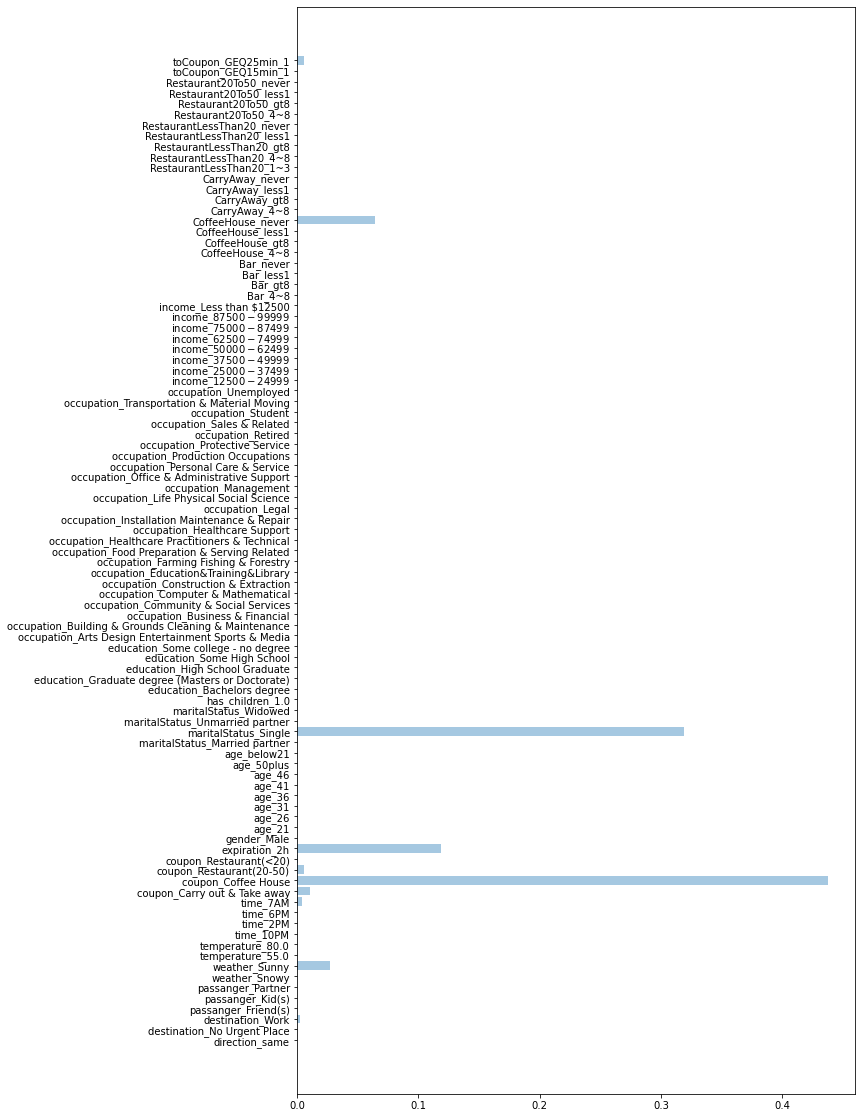

In [687]:
%matplotlib inline
plt.rc('figure', figsize=(10, 20))

y_list = gboost_1.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_cols
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

Model Evaluation

In [688]:
from sklearn.metrics import confusion_matrix

confusion_gboost= confusion_matrix(y_test, pred_gboost_test)
print("Confusion matrix:\n{}".format(confusion_gboost))

Confusion matrix:
[[ 83 231]
 [ 83 317]]


In [689]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_gboost_test, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.50      0.26      0.35       314
    Coupon Accepted       0.58      0.79      0.67       400

           accuracy                           0.56       714
          macro avg       0.54      0.53      0.51       714
       weighted avg       0.54      0.56      0.53       714



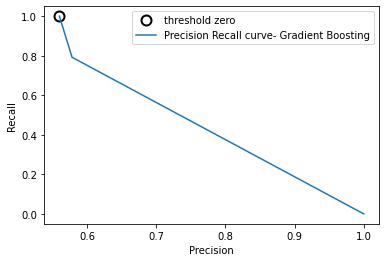

In [690]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_gboost, recall_gboost, thresholds_gboost = precision_recall_curve(y_test, gboost.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gboost))

plt.plot(precision_gboost[close_zero], recall_gboost[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_gboost, recall_gboost, label="Precision Recall curve- Gradient Boosting")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

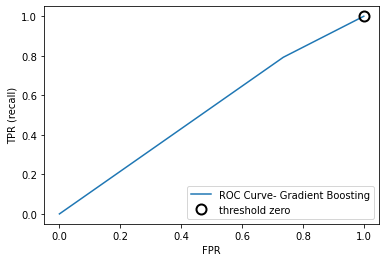

In [691]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, gboost.predict_proba(X_test)[:, 1])

plt.plot(fpr_gboost, tpr_gboost, label="ROC Curve- Gradient Boosting")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gboost))
plt.plot(fpr_gboost[close_zero], tpr_gboost[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Principal component analysis 

In [692]:
len(X_train_cols)

93

Total number of features present is 93

In [693]:
from sklearn.decomposition import PCA

Using Principal component analysis for dimensionality reduction with 95% variance explained.

In [694]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
pca.n_components_

57

In [695]:
np.sum(pca.explained_variance_ratio_)

0.9503977285801276

In [696]:
X_test_pca = pca.transform(X_test)

### Running all models with PCA

#### K Neighbors Classifier -PCA

Hyperparameter Tuning

In [701]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'n_neighbors': [*range(1,20)]}

# Re-run with smaller n_neighbors set 
param_grid = {'n_neighbors': [4,11,19,24],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights':['uniform','distance']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [4, 11, 19, 24], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}


In [702]:
from sklearn.neighbors import KNeighborsClassifier

pca_grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring = 'recall', n_jobs= -1, verbose = 4)

In [703]:
pca_grid_search_knn.fit(X_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    9.2s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [4, 11, 19, 24],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall', verbose=4)

In [704]:
print("Best parameters: {}".format(pca_grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_knn.best_score_))

Best parameters: {'algorithm': 'auto', 'n_neighbors': 24, 'weights': 'distance'}
Best cross-validation score: 0.81


In [705]:
# convert to DataFrame
results_knn_pca = pd.DataFrame(pca_grid_search_knn.cv_results_)
# show the first 5 rows
display(results_knn_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013798,0.001453,0.051538,0.006690,auto,4,uniform,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh...",0.526882,0.521505,...,0.534984,0.024164,29,0.698520,0.676985,0.668910,0.681023,0.676075,0.680303,0.009910
1,0.014005,0.002957,0.040804,0.005771,auto,4,distance,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh...",0.731183,0.709677,...,0.702877,0.032614,25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.011294,0.001310,0.047782,0.003379,auto,11,uniform,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig...",0.741935,0.817204,...,0.766399,0.027681,21,0.825034,0.835801,0.808883,0.837147,0.825269,0.826427,0.010138
3,0.011073,0.000929,0.044232,0.004974,auto,11,distance,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig...",0.747312,0.817204,...,0.769625,0.026387,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.011862,0.003155,0.049015,0.003476,auto,19,uniform,"{'algorithm': 'auto', 'n_neighbors': 19, 'weig...",0.806452,0.817204,...,0.797629,0.013037,9,0.826380,0.845222,0.818304,0.853297,0.822581,0.833157,0.013635


In [707]:
print('Train score: {:.4f}'.format(pca_grid_search_knn.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_knn.score(X_test_pca, y_test)))

Train score: 1.0000
Test score: 0.8000


In [710]:
pred_knn_pca = pca_grid_search_knn.predict(X_test_pca)

Model Evaluation

In [711]:
from sklearn.metrics import confusion_matrix

confusion_knn_pca = confusion_matrix(y_test, pred_knn_pca)
print("Confusion matrix:\n{}".format(confusion_knn_pca))

Confusion matrix:
[[135 179]
 [ 80 320]]


In [712]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.63      0.43      0.51       314
    Coupon Accepted       0.64      0.80      0.71       400

           accuracy                           0.64       714
          macro avg       0.63      0.61      0.61       714
       weighted avg       0.64      0.64      0.62       714



#### Logistic Regression -PCA

Hyperparameter Tuning

In [713]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty': ['l1','l2'],
              'solver':['saga', 'newton-cg', 'lbfgs', 'liblinear']}
             
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['saga', 'newton-cg', 'lbfgs', 'liblinear']}


In [714]:
from sklearn.linear_model import LogisticRegression

pca_grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, return_train_score=True, scoring= 'recall', n_jobs= -1, verbose = 4)


In [715]:
pca_grid_search_logreg.fit(X_train_pca, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 265 out of 280 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall', verbose=4)

In [716]:
print("Best parameters: {}".format(pca_grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_logreg.best_score_))

Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 1.00


In [717]:
# convert to DataFrame
results_logreg_pca = pd.DataFrame(pca_grid_search_logreg.cv_results_)
# show the first 5 rows
display(results_logreg_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003385,0.000492,0.001196,0.000399,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
1,0.001017,0.000041,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000597,0.000487,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003332,0.000430,0.001422,0.000589,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.0,0.0,...,0.0,0.0,41,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.021365,0.003751,0.002093,0.001196,0.001,l2,saga,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}",1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,0.997312,0.999462,0.001075


In [719]:
print('Train score: {:.4f}'.format(pca_grid_search_logreg.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_logreg.score(X_test_pca, y_test)))

Train score: 1.0000
Test score: 1.0000


In [720]:
pred_logreg_pca = pca_grid_search_logreg.predict(X_test_pca)

Model Evaluation

In [721]:
from sklearn.metrics import confusion_matrix

confusion_logreg_pca = confusion_matrix(y_test, pred_logreg_pca)
print("Confusion matrix:\n{}".format(confusion_logreg_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [722]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Linear SVC -PCA

Hyperparameter Tuning

In [723]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'loss':['hinge','squared_hinge'], 
              'penalty':['l1','l2']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge'], 'penalty': ['l1', 'l2']}


In [724]:
from sklearn.svm import LinearSVC

pca_grid_search_linsvc = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True, scoring= 'recall', n_jobs= -1, verbose = 4)


In [725]:
pca_grid_search_linsvc.fit(X_train_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall', verbose=4)

In [726]:
print("Best parameters: {}".format(pca_grid_search_linsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_linsvc.best_score_))

Best parameters: {'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation score: 0.88


In [727]:
# convert to DataFrame
results_linsvc_pca = pd.DataFrame(pca_grid_search_linsvc.cv_results_)
# show the first 5 rows
display(results_linsvc_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001495,0.000445,0.000000,0.000000,0.001,hinge,l1,"{'C': 0.001, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004241,0.002060,0.001216,0.000285,0.001,hinge,l2,"{'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'}",0.876344,0.897849,...,0.878349,0.012692,1,0.90175,0.884253,0.892328,0.882907,0.873656,0.886979,0.009469
2,0.001558,0.000491,0.000000,0.000000,0.001,squared_hinge,l1,"{'C': 0.001, 'loss': 'squared_hinge', 'penalty...",NaN,NaN,...,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003981,0.000633,0.001004,0.000151,0.001,squared_hinge,l2,"{'C': 0.001, 'loss': 'squared_hinge', 'penalty...",0.822581,0.860215,...,0.811590,0.037917,2,0.82638,0.822342,0.826380,0.826380,0.817204,0.823737,0.003621
4,0.001506,0.000518,0.000000,0.000000,0.01,hinge,l1,"{'C': 0.01, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


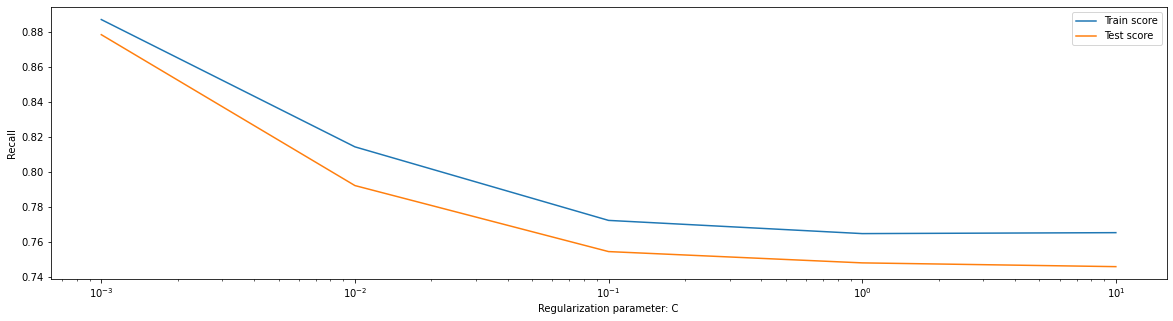

In [728]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_linsvc_pca[(results_linsvc_pca['param_loss']=='hinge')&(results_linsvc_pca['param_penalty']=='l2')].mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_linsvc_pca[(results_linsvc_pca['param_loss']=='hinge')&(results_linsvc_pca['param_penalty']=='l2')].mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Recall')
plt.xscale('log')

In [729]:
print('Train score: {:.4f}'.format(pca_grid_search_linsvc.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_linsvc.score(X_test_pca, y_test)))

Train score: 0.8870
Test score: 0.8425


In [730]:
pred_linsvc_pca = pca_grid_search_linsvc.predict(X_test_pca)

Model Evaluation

In [731]:
from sklearn.metrics import confusion_matrix

confusion_linsvc_pca = confusion_matrix(y_test, pred_linsvc_pca)
print("Confusion matrix:\n{}".format(confusion_linsvc_pca))

Confusion matrix:
[[ 92 222]
 [ 63 337]]


In [732]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_linsvc_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.59      0.29      0.39       314
    Coupon Accepted       0.60      0.84      0.70       400

           accuracy                           0.60       714
          macro avg       0.60      0.57      0.55       714
       weighted avg       0.60      0.60      0.57       714



#### SVC(kernel = 'linear') -PCA

Hyperparameter Tuning

In [733]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [734]:
from sklearn.svm import SVC

pca_grid_search_ksvclin = GridSearchCV(SVC(kernel = 'linear', cache_size =14000), param_grid, cv=2, return_train_score=True, scoring= 'recall', n_jobs= -1, verbose = 4)

In [735]:
pca_grid_search_ksvclin.fit(X_train_pca, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.4s finished


GridSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall', verbose=4)

In [736]:
print("Best parameters: {}".format(pca_grid_search_ksvclin.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_ksvclin.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 1.00


In [737]:
# convert to DataFrame
results_ksvclin_pca = pd.DataFrame(pca_grid_search_ksvclin.cv_results_)
# show the first 5 rows
display(results_ksvclin_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.037817,0.000543,0.028969,0.000677,0.001,{'C': 0.001},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
1,0.041427,0.000998,0.044605,0.016679,0.01,{'C': 0.01},0.918280,0.816810,0.867545,0.050735,2,0.915948,0.866667,0.891307,0.024641
2,0.090166,0.015538,0.030285,0.003194,0.1,{'C': 0.1},0.763441,0.724138,0.743789,0.019651,3,0.784483,0.791398,0.787940,0.003458
3,0.309052,0.007897,0.023808,0.001581,1,{'C': 1},0.752688,0.721983,0.737335,0.015353,4,0.771552,0.791398,0.781475,0.009923
4,1.969034,0.522792,0.019290,0.001088,10,{'C': 10},0.746237,0.706897,0.726567,0.019670,5,0.769397,0.782796,0.776096,0.006700


In [738]:
print('Train score: {:.4f}'.format(pca_grid_search_ksvclin.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_ksvclin.score(X_test_pca, y_test)))

Train score: 1.0000
Test score: 1.0000


In [739]:
pred_ksvclin_pca = pca_grid_search_ksvclin.predict(X_test_pca)

Model Evaluation

In [740]:
from sklearn.metrics import confusion_matrix

confusion_ksvclin_pca = confusion_matrix(y_test, pred_ksvclin_pca)
print("Confusion matrix:\n{}".format(confusion_ksvclin_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [741]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvclin_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVC(kernel = 'poly') -PCA

Hyperparameter Tuning

In [742]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [743]:
from sklearn.svm import SVC

pca_random_search_ksvcpoly = RandomizedSearchCV(SVC(kernel= 'poly', degree=3, cache_size= 14000), param_grid, cv= 2, scoring ='recall', return_train_score=True, n_jobs= -1, verbose = 4)

In [744]:
pca_random_search_ksvcpoly.fit(X_train_pca, y_train)

C:\Users\neema\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.1s remaining:    0.1s


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished


RandomizedSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='poly'),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   return_train_score=True, scoring='recall', verbose=4)

In [745]:
print("Best parameters: {}".format(pca_random_search_ksvcpoly.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_random_search_ksvcpoly.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 1.00


In [747]:
# convert to DataFrame
results_ksvcpoly_pca = pd.DataFrame(pca_random_search_ksvcpoly.cv_results_)
# show the first 5 rows
display(results_ksvcpoly_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.044870,0.002487,0.034355,0.000504,0.001,{'C': 0.001},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
1,0.052513,0.001497,0.049570,0.015225,0.01,{'C': 0.01},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
2,0.072174,0.016176,0.035677,0.000753,0.1,{'C': 0.1},1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
3,0.108375,0.004308,0.035107,0.000231,1,{'C': 1},0.806452,0.773707,0.790079,0.016372,4,0.997845,0.989247,0.993546,0.004299
4,0.183111,0.001828,0.030229,0.000652,10,{'C': 10},0.698925,0.672414,0.685669,0.013255,6,1.000000,1.000000,1.000000,0.000000


In [749]:
print('Train score: {:.4f}'.format(pca_random_search_ksvcpoly.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_random_search_ksvcpoly.score(X_test_pca, y_test)))

Train score: 1.0000
Test score: 1.0000


In [751]:
pred_ksvcpoly_pca = pca_random_search_ksvcpoly.predict(X_test_pca)

Model Evaluation

In [752]:
from sklearn.metrics import confusion_matrix

confusion_ksvcpoly_pca = confusion_matrix(y_test, pred_ksvcpoly_pca)
print("Confusion matrix:\n{}".format(confusion_ksvcpoly_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [753]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcpoly_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVC(kernel = 'rbf') -PCA

Hyperparameter Tuning

In [754]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [755]:
from sklearn.svm import SVC

pca_grid_search_ksvcrbf = GridSearchCV(SVC(kernel = 'rbf', cache_size =14000), param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)

In [756]:
pca_grid_search_ksvcrbf.fit(X_train_pca, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  57 out of  72 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    3.1s finished


GridSearchCV(cv=2, estimator=SVC(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall', verbose=4)

In [757]:
print("Best parameters: {}".format(pca_grid_search_ksvcrbf.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_ksvcrbf.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 1.00


In [758]:
# convert to DataFrame
results_ksvcrbf_pca = pd.DataFrame(pca_grid_search_ksvcrbf.cv_results_)
# show the first 5 rows
display(results_ksvcrbf_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.046563,0.001467,0.042198,1.025319e-03,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
1,0.046536,0.000499,0.041230,7.152557e-07,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
2,0.050086,0.001060,0.054407,1.218140e-02,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
3,0.064718,0.010588,0.046035,1.492739e-03,0.001,1,"{'C': 0.001, 'gamma': 1}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
4,0.059475,0.005839,0.057020,4.994273e-03,0.001,10,"{'C': 0.001, 'gamma': 10}",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0


In [759]:
print('Train score: {:.4f}'.format(pca_grid_search_ksvcrbf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_ksvcrbf.score(X_test_pca, y_test)))

Train score: 1.0000
Test score: 1.0000


In [760]:
pred_ksvcrbf_pca = pca_grid_search_ksvcrbf.predict(X_test_pca)

Model Evaluation

In [761]:
from sklearn.metrics import confusion_matrix

confusion_ksvcrbf_pca = confusion_matrix(y_test, pred_ksvcrbf_pca)
print("Confusion matrix:\n{}".format(confusion_ksvcrbf_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [762]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcrbf_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier -PCA

Hyperparameter Tuning

In [763]:
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": range(1,10),
           "min_samples_split": range(2,10),
           "max_leaf_nodes": range(2,6),
           "criterion":['gini','entropy'],
           "splitter":['best','random']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'max_leaf_nodes': range(2, 6), 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}


In [764]:
from sklearn.tree import DecisionTreeClassifier

pca_grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5,scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)

In [765]:
pca_grid_search_dtree.fit(X_train_pca, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 5232 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:   14.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='recall', verbose=4)

In [766]:
print("Best parameters: {}".format(pca_grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_dtree.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation score: 0.99


In [767]:
# convert to DataFrame
results_dtree_pca = pd.DataFrame(pca_grid_search_dtree.cv_results_)
# show the first 5 rows
display(results_dtree_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_split,param_splitter,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008695,1.818194e-04,0.001976,0.000602,gini,1,2,2,best,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.673833,0.170901,1057,1.0,0.582773,0.71467,0.537012,0.715054,0.709902,0.161406
1,0.002541,4.505571e-04,0.000962,0.000068,gini,1,2,2,random,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.989247,0.021505,1,1.0,1.000000,1.00000,0.962315,1.000000,0.992463,0.015074
2,0.009244,1.016359e-03,0.001597,0.000488,gini,1,2,3,best,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.673833,0.170901,1057,1.0,0.582773,0.71467,0.537012,0.715054,0.709902,0.161406
3,0.001993,4.672031e-07,0.001026,0.000054,gini,1,2,3,random,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.989247,0.021505,1,1.0,1.000000,1.00000,0.962315,1.000000,0.992463,0.015074
4,0.008453,7.620199e-04,0.001297,0.000397,gini,1,2,4,best,"{'criterion': 'gini', 'max_depth': 1, 'max_lea...",...,0.673833,0.170901,1057,1.0,0.582773,0.71467,0.537012,0.715054,0.709902,0.161406


In [768]:
print('Train score: {:.4f}'.format(pca_grid_search_dtree.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_dtree.score(X_test_pca, y_test)))

Train score: 1.0000
Test score: 1.0000


In [769]:
pred_dtree_pca = pca_grid_search_dtree.predict(X_test_pca)

Model Evaluation

In [770]:
from sklearn.metrics import confusion_matrix

confusion_dtree_pca = confusion_matrix(y_test, pred_dtree_pca)
print("Confusion matrix:\n{}".format(confusion_dtree_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [771]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Voting Classifier - Hard -PCA

In [772]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [775]:
log_clf_pca = LogisticRegression(C = 0.001, max_iter=500, penalty='l1', solver='saga', n_jobs =-1, verbose = 4 )
log_clf_pca.fit(X_train_pca, y_train)

convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.001, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='saga', verbose=4)

In [776]:
knn_clf_pca = KNeighborsClassifier(n_neighbors = 24, algorithm= 'brute', weights='distance', n_jobs =-1)
knn_clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=24,
                     weights='distance')

In [777]:
svm_clf_pca = SVC(C = 0.001, gamma = 0.001, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
svm_clf_pca.fit(X_train_pca, y_train)

[LibSVM]

SVC(C=0.001, cache_size=14000, gamma=0.001, probability=True, verbose=4)

In [778]:
pca_voting_hard = VotingClassifier(estimators=[('lr', log_clf_pca), ('knn', knn_clf_pca), ('svc', svm_clf_pca)], voting='hard',n_jobs =-1, verbose = 4)
pca_voting_hard.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001, max_iter=500,
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga', verbose=4)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                                   n_neighbors=24,
                                                   weights='distance')),
                             ('svc',
                              SVC(C=0.001, cache_size=14000, gamma=0.001,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4)

In [780]:
from sklearn.metrics import recall_score

for clf in (log_clf_pca, knn_clf_pca, svm_clf_pca, pca_voting_hard):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_pca)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

LogisticRegression 0.0
KNeighborsClassifier 0.8
SVC 1.0
VotingClassifier 1.0


In [781]:
pred_voting_hard_train_pca = pca_voting_hard.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_voting_hard_train_pca)))

pred_voting_hard_test_pca = pca_voting_hard.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_voting_hard_test_pca)))

Train score: 1.0000
Test score: 1.0000


Model Evaluation

In [782]:
from sklearn.metrics import confusion_matrix

confusion_voting_hard_pca = confusion_matrix(y_test, pred_voting_hard_test_pca)
print("Confusion matrix:\n{}".format(confusion_voting_hard_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [783]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_hard_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Voting Classifier - Soft -PCA

In [784]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [785]:
log_clf_pca = LogisticRegression(C = 0.001, max_iter=500, penalty='l1', solver='saga', n_jobs =-1, verbose = 4 )
log_clf_pca.fit(X_train_pca, y_train)

convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.001, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='saga', verbose=4)

In [786]:
knn_clf_pca = KNeighborsClassifier(n_neighbors = 24, algorithm= 'brute', weights='distance', n_jobs =-1)
knn_clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=24,
                     weights='distance')

In [787]:
svm_clf_pca = SVC(C =0.001, gamma = 0.001, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
svm_clf_pca.fit(X_train_pca, y_train)

[LibSVM]

SVC(C=0.001, cache_size=14000, gamma=0.001, probability=True, verbose=4)

In [788]:
pca_voting_soft = VotingClassifier(estimators=[('lr', log_clf_pca), ('knn', knn_clf_pca), ('svc', svm_clf_pca)], voting='soft',n_jobs =-1, verbose = 4)
pca_voting_soft.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001, max_iter=500,
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga', verbose=4)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                                   n_neighbors=24,
                                                   weights='distance')),
                             ('svc',
                              SVC(C=0.001, cache_size=14000, gamma=0.001,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4, voting='soft')

In [789]:
for clf in (log_clf_pca, knn_clf_pca, svm_clf_pca, pca_voting_soft):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_pca)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

LogisticRegression 1.0
KNeighborsClassifier 0.8
SVC 1.0
VotingClassifier 0.8275


In [790]:
pred_voting_soft_train_pca = pca_voting_soft.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_voting_soft_train_pca)))

pred_voting_soft_test_pca = pca_voting_soft.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_voting_soft_test_pca)))

Train score: 1.0000
Test score: 0.8275


Model Evaluation

In [791]:
from sklearn.metrics import confusion_matrix

confusion_voting_soft_pca = confusion_matrix(y_test, pred_voting_soft_test_pca)
print("Confusion matrix:\n{}".format(confusion_voting_soft_pca))

Confusion matrix:
[[119 195]
 [ 69 331]]


In [792]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_soft_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.63      0.38      0.47       314
    Coupon Accepted       0.63      0.83      0.71       400

           accuracy                           0.63       714
          macro avg       0.63      0.60      0.59       714
       weighted avg       0.63      0.63      0.61       714



#### Bagging -SVM -PCA

Hyperparameter Tuning

In [793]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [798]:
param_grid = {'base_estimator__C': [0.001, 0.01, 0.1, 1, 10],
              'base_estimator__gamma': [0.001, 0.01, 0.1, 1, 10],
              'n_estimators': [10,100,500]}

svc_clf_pca = SVC(probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
bag_svc_m_pca = BaggingClassifier(base_estimator=svc_clf, bootstrap=True, n_jobs=-1, random_state=0, verbose =4)
pca_bag_svc = GridSearchCV(bag_svc_m_pca, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
pca_bag_svc.fit(X_train_pca, y_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 28.5min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   11.1s remaining:   33.5s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   11.7s remaining:    7.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   12.0s finished


GridSearchCV(cv=2,
             estimator=BaggingClassifier(base_estimator=SVC(cache_size=14000,
                                                            probability=True,
                                                            verbose=4),
                                         n_jobs=-1, random_state=0, verbose=4),
             n_jobs=-1,
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10],
                         'base_estimator__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [10, 100, 500]},
             return_train_score=True, scoring='recall', verbose=4)

In [799]:
print("Best parameters: {}".format(pca_bag_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_bag_svc.best_score_))

Best parameters: {'base_estimator__C': 0.001, 'base_estimator__gamma': 1, 'n_estimators': 100}
Best cross-validation score: 1.00


In [800]:
# convert to DataFrame
results_bag_svc_pca = pd.DataFrame(pca_bag_svc.cv_results_)
# show the first 5 rows
display(results_bag_svc_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__C,param_base_estimator__gamma,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.583910,0.003327,2.019014,0.159489,0.001,0.001,10,"{'base_estimator__C': 0.001, 'base_estimator__...",0.756989,0.717672,0.737331,0.019658,68,0.778017,0.769892,0.773955,0.004062
1,6.526683,0.603338,4.153533,0.575747,0.001,0.001,100,"{'base_estimator__C': 0.001, 'base_estimator__...",0.791398,0.730603,0.761001,0.030397,47,0.808190,0.795699,0.801944,0.006245
2,43.880378,0.319718,19.642672,0.054063,0.001,0.001,500,"{'base_estimator__C': 0.001, 'base_estimator__...",0.802151,0.728448,0.765299,0.036851,44,0.812500,0.802151,0.807325,0.005175
3,2.010661,0.093945,3.743537,0.008161,0.001,0.01,10,"{'base_estimator__C': 0.001, 'base_estimator__...",0.800000,0.715517,0.757759,0.042241,50,0.829741,0.782796,0.806269,0.023473
4,11.508560,0.138987,6.940629,0.132983,0.001,0.01,100,"{'base_estimator__C': 0.001, 'base_estimator__...",0.808602,0.728448,0.768525,0.040077,42,0.823276,0.806452,0.814864,0.008412


In [801]:
pred_bag_svc_train_pca = pca_bag_svc.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_bag_svc_train_pca)))

pred_bag_svc_test_pca = pca_bag_svc.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_bag_svc_test_pca)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.9s remaining:    8.8s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    3.0s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Train score: 1.0000
Test score: 0.9975


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.7s finished


Model Evaluation

In [802]:
from sklearn.metrics import confusion_matrix

confusion_bag_svc_pca = confusion_matrix(y_test, pred_bag_svc_test_pca)
print("Confusion matrix:\n{}".format(confusion_bag_svc_pca))

Confusion matrix:
[[  9 305]
 [  1 399]]


In [803]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_svc_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.90      0.03      0.06       314
    Coupon Accepted       0.57      1.00      0.72       400

           accuracy                           0.57       714
          macro avg       0.73      0.51      0.39       714
       weighted avg       0.71      0.57      0.43       714



#### Bagging -Random Forest -PCA

Hyperparameter Tuning

In [804]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto'],
              'max_depth' : [2,4,6,8,9],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,3,4,6,8],
              'min_samples_leaf':[1,2,3]}

#max_leaf_nodes=10
bag_rnd_m_pca = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, n_jobs=-1, random_state=0, verbose = 4)
pca_bag_rnd = GridSearchCV(bag_rnd_m_pca, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
pca_bag_rnd.fit(X_train_pca, y_train)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500

building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500building tree 11 of 500

building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500building tree 17 of 500

building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500building tree 22 of 500

building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500building tree 27 of 500
building tree 28 of 500

building tree 29 of 500building tree 30 of 500

building tree 31 of 500
building tree 32 of 500building tree 33 of 500

building tree 34 of 500building tree 35 of 500

building tree 36 of 500building tree 37 of 500

building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s


building tree 148 of 500
building tree 149 of 500
building tree 150 of 500building tree 151 of 500

building tree 152 of 500building tree 153 of 500

building tree 154 of 500building tree 155 of 500

building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500building tree 160 of 500

building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500building tree 169 of 500

building tree 170 of 500building tree 171 of 500

building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500building tree 178 of 500building tree 179 of 500


building tree 180 of 500
building tree 181 of 500
building tree 182 of 500building tree 183 of 500building tree 184 of 500


building tree 185 of 500
building tree 186 of 500
building tree 187 of 500


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.2s


building tree 294 of 500building tree 295 of 500
building tree 296 of 500

building tree 297 of 500
building tree 298 of 500
building tree 299 of 500building tree 300 of 500building tree 301 of 500

building tree 302 of 500building tree 303 of 500

building tree 304 of 500

building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500building tree 313 of 500

building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500building tree 319 of 500building tree 320 of 500
building tree 321 of 500

building tree 322 of 500

building tree 323 of 500
building tree 324 of 500building tree 325 of 500

building tree 326 of 500
building tree 327 of 500building tree 328 of 500
building tree 329 of 500

building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500b

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_leaf_nodes=10,
                                              n_estimators=500, n_jobs=-1,
                                              random_state=0, verbose=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 9], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='recall', verbose=4)

In [805]:
print("Best parameters: {}".format(pca_bag_rnd.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_bag_rnd.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score: 0.99


In [806]:
# convert to DataFrame
results_bag_rnd_pca = pd.DataFrame(pca_bag_rnd.cv_results_)
# show the first 5 rows
display(results_bag_rnd_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.342736,0.025056,0.042383,0.004241,gini,2,auto,1,2,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.982796,0.965517,0.974156,0.008639,46,0.997845,0.993548,0.995697,0.002148
1,1.014180,0.026721,0.091831,0.010145,gini,2,auto,1,2,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.982796,0.974138,0.978467,0.004329,31,0.997845,0.993548,0.995697,0.002148
2,0.332292,0.002166,0.044432,0.000183,gini,2,auto,1,3,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.982796,0.965517,0.974156,0.008639,46,0.997845,0.993548,0.995697,0.002148
3,1.038464,0.018760,0.086962,0.001453,gini,2,auto,1,3,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.982796,0.974138,0.978467,0.004329,31,0.997845,0.993548,0.995697,0.002148
4,0.477862,0.064898,0.106675,0.043026,gini,2,auto,1,4,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.982796,0.965517,0.974156,0.008639,46,0.997845,0.993548,0.995697,0.002148


In [810]:
pred_bag_rnd_train_pca = pca_bag_rnd.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_bag_rnd_train)))

pred_bag_rnd_test_pca = pca_bag_rnd.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_bag_rnd_test)))

Train score: 0.9795
Test score: 0.9675


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


Model Evaluation

In [811]:
from sklearn.metrics import confusion_matrix

confusion_bag_rnd_pca= confusion_matrix(y_test, pred_bag_rnd_test_pca)
print("Confusion matrix:\n{}".format(confusion_bag_rnd_pca))

Confusion matrix:
[[  6 308]
 [  2 398]]


In [812]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_rnd_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.75      0.02      0.04       314
    Coupon Accepted       0.56      0.99      0.72       400

           accuracy                           0.57       714
          macro avg       0.66      0.51      0.38       714
       weighted avg       0.65      0.57      0.42       714



#### Pasting -Random Forest -PCA

Hyperparameter Tuning

In [813]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto'],
              'max_depth' : [2,4,6,8,9],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,3,4,6,8],
              'min_samples_leaf':[1,2,3]}

#max_leaf_nodes=10
pst_rnd_m_pca = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0, verbose = 4, bootstrap=False)
pca_pst_rnd = GridSearchCV(pst_rnd_m_pca, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
pca_pst_rnd.fit(X_train_pca, y_train)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500building tree 2 of 500building tree 3 of 500


building tree 4 of 500
building tree 5 of 500building tree 6 of 500
building tree 7 of 500

building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500building tree 21 of 500

building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500building tree 40 of 500

building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.0s


building tree 183 of 500
building tree 184 of 500building tree 185 of 500

building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500building tree 193 of 500

building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500building tree 207 of 500

building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500building tree 213 of 500

building tree 214 of 500
building tree 215 of 500building tree 216 of 500

building tree 217 of 500building tree 218 of 500

building tree 219 of 500
building tree 220 of 500
building tree 221 of 500building tree 222 of 500



[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.1s


building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500building tree 352 of 500
building tree 353 of 500building tree 354 of 500building tree 355 of 500



building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500building tree 362 of 500building tree 363 of 500


building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500building tree 381 of 500

building tree 382 of 500building tree 383 of 500

building tree 384 of 500building tree 385 of 500

building tree 386 of 500


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(bootstrap=False, n_estimators=500,
                                              n_jobs=-1, random_state=0,
                                              verbose=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 9], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='recall', verbose=4)

In [814]:
print("Best parameters: {}".format(pca_pst_rnd.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_pst_rnd.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score: 0.96


In [815]:
# convert to DataFrame
results_pst_rnd_pca = pd.DataFrame(pca_pst_rnd.cv_results_)
# show the first 5 rows
display(results_pst_rnd_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.260289,0.002551,0.051776,0.000010,gini,2,auto,1,2,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.972043,0.946121,0.959082,0.012961,31,0.99569,0.989247,0.992468,0.003221
1,0.865129,0.002436,0.100199,0.004488,gini,2,auto,1,2,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.965591,0.959052,0.962322,0.003270,16,0.99569,0.991398,0.993544,0.002146
2,0.291316,0.018296,0.038211,0.001390,gini,2,auto,1,3,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.972043,0.946121,0.959082,0.012961,31,0.99569,0.989247,0.992468,0.003221
3,1.016061,0.165519,0.109827,0.006106,gini,2,auto,1,3,500,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.965591,0.959052,0.962322,0.003270,16,0.99569,0.991398,0.993544,0.002146
4,0.440432,0.125445,0.153765,0.090170,gini,2,auto,1,4,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.972043,0.946121,0.959082,0.012961,31,0.99569,0.989247,0.992468,0.003221


In [817]:
pred_pst_rnd_train_pca = pca_pst_rnd.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_pst_rnd_train_pca)))

pred_pst_rnd_test_pca = pca_pst_rnd.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_pst_rnd_test_pca)))

Train score: 0.9935
Test score: 0.9900


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


Model Evaluation

In [818]:
from sklearn.metrics import confusion_matrix

confusion_pst_rnd_pca= confusion_matrix(y_test, pred_pst_rnd_test_pca)
print("Confusion matrix:\n{}".format(confusion_pst_rnd_pca))

Confusion matrix:
[[ 12 302]
 [  4 396]]


In [819]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_pst_rnd_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.75      0.04      0.07       314
    Coupon Accepted       0.57      0.99      0.72       400

           accuracy                           0.57       714
          macro avg       0.66      0.51      0.40       714
       weighted avg       0.65      0.57      0.44       714



#### AdaBoost - Logistic Regression -PCA

Hyperparameter Tuning

In [821]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'base_estimator__C': [0.001, 0.01, 0.1, 1], 
              'base_estimator__penalty': ['l1','l2'],
              'base_estimator__solver':['saga', 'newton-cg', 'lbfgs', 'liblinear'],
              'algorithm':['SAMME','SAMME.R'],
              'n_estimators':[100,200]}

log_clf_pca = LogisticRegression(max_iter=500, n_jobs =-1, verbose = 4 )

ada_log_m_pca = AdaBoostClassifier(base_estimator=log_clf_pca, learning_rate=0.5, random_state=0)
pca_ada_log = GridSearchCV(ada_log_m_pca, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)
pca_ada_log.fit(X_train_pca, y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    9.9s


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=500,
                                                                            n_jobs=-1,
                                                                            verbose=4),
                                          learning_rate=0.5, random_state=0),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__C': [0.001, 0.01, 0.1, 1],
                         'base_estimator__penalty': ['l1', 'l2'],
                         'base_estimator__solver': ['saga', 'newton-cg',
                                                    'lbfgs', 'liblinear'],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='recall', verbose=4)

In [822]:
print("Best parameters: {}".format(pca_ada_log.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_ada_log.best_score_))

Best parameters: {'algorithm': 'SAMME', 'base_estimator__C': 0.001, 'base_estimator__penalty': 'l1', 'base_estimator__solver': 'saga', 'n_estimators': 100}
Best cross-validation score: 1.00


In [823]:
# convert to DataFrame
results_ada_log_pca = pd.DataFrame(pca_ada_log.cv_results_)
# show the first 5 rows
display(results_ada_log_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator__C,param_base_estimator__penalty,param_base_estimator__solver,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.047332,0.019310,0.001994,1.192093e-07,SAMME,0.001,l1,saga,100,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
1,0.056262,0.017444,0.001502,5.245209e-06,SAMME,0.001,l1,saga,200,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,0.0
2,0.002603,0.000101,0.000000,0.000000e+00,SAMME,0.001,l1,newton-cg,100,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN
3,0.001746,0.000247,0.000000,0.000000e+00,SAMME,0.001,l1,newton-cg,200,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",NaN,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN
4,0.001993,0.000000,0.000000,0.000000e+00,SAMME,0.001,l1,lbfgs,100,"{'algorithm': 'SAMME', 'base_estimator__C': 0....",NaN,NaN,NaN,NaN,96,NaN,NaN,NaN,NaN


In [825]:
pred_ada_log_train_pca = pca_ada_log.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_ada_log_train_pca)))

pred_ada_log_test_pca = pca_ada_log.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_ada_log_test_pca)))

Train score: 1.0000
Test score: 1.0000


Model Evaluation

In [826]:
from sklearn.metrics import confusion_matrix

confusion_ada_log_pca= confusion_matrix(y_test, pred_ada_log_test_pca)
print("Confusion matrix:\n{}".format(confusion_ada_log_pca))

Confusion matrix:
[[  0 314]
 [  0 400]]


In [827]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada_log_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.00      0.00      0.00       314
    Coupon Accepted       0.56      1.00      0.72       400

           accuracy                           0.56       714
          macro avg       0.28      0.50      0.36       714
       weighted avg       0.31      0.56      0.40       714



C:\Users\neema\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gradient Boosting -PCA

Hyperparameter Tuning

In [828]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'min_samples_split':[2,3],
              'subsample':[0.6,0.8,1],
              'min_samples_leaf':[1,2],
              'max_depth' : [2,3,7],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2]}


gboost_m_pca = GradientBoostingClassifier(random_state=0)
pca_gboost =  GridSearchCV(gboost_m_pca, param_grid, cv=2, scoring= 'recall', return_train_score=True, n_jobs= -1, verbose = 4)    
pca_gboost.fit(X_train_pca, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.9min finished


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2], 'max_depth': [2, 3, 7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150],
                         'subsample': [0.6, 0.8, 1]},
             return_train_score=True, scoring='recall', verbose=4)

In [829]:
print("Best parameters: {}".format(pca_gboost.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_gboost.best_score_))

Best parameters: {'learning_rate': 2, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.6}
Best cross-validation score: 0.90


In [830]:
# convert to DataFrame
results_gboost_pca = pd.DataFrame(pca_gboost.cv_results_)
# show the first 5 rows
display(results_gboost_pca.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.534634,0.045704,0.002852,1.372099e-04,0.5,2,1,2,100,0.6,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.675269,0.653017,0.664143,0.011126,106,0.978448,0.989247,0.983848,0.005400
1,0.737717,0.054534,0.002850,1.398325e-04,0.5,2,1,2,100,0.8,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.658065,0.693966,0.676015,0.017951,79,0.995690,0.989247,0.992468,0.003221
2,0.937201,0.097288,0.000745,7.447004e-04,0.5,2,1,2,100,1,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.705376,0.665948,0.685662,0.019714,56,1.000000,1.000000,1.000000,0.000000
3,0.851939,0.054290,0.000000,0.000000e+00,0.5,2,1,2,150,0.6,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.683871,0.668103,0.675987,0.007884,83,0.997845,1.000000,0.998922,0.001078
4,1.057876,0.078711,0.002990,1.192093e-07,0.5,2,1,2,150,0.8,"{'learning_rate': 0.5, 'max_depth': 2, 'min_sa...",0.651613,0.683190,0.667401,0.015788,97,1.000000,1.000000,1.000000,0.000000


In [832]:
pred_gboost_train_pca = pca_gboost.predict(X_train_pca)
print('Train score: {:.4f}'.format(recall_score(y_train, pred_gboost_train_pca)))

pred_gboost_test_pca = pca_gboost.predict(X_test_pca)
print('Test score: {:.4f}'.format(recall_score(y_test, pred_gboost_test_pca)))

Train score: 0.8213
Test score: 0.7800


Model Evaluation

In [833]:
from sklearn.metrics import confusion_matrix

confusion_gboost_pca= confusion_matrix(y_test, pred_gboost_test_pca)
print("Confusion matrix:\n{}".format(confusion_gboost_pca))

Confusion matrix:
[[ 37 277]
 [ 88 312]]


In [834]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_gboost_test_pca, target_names=["Coupon not Accepted", "Coupon Accepted"]))

                     precision    recall  f1-score   support

Coupon not Accepted       0.30      0.12      0.17       314
    Coupon Accepted       0.53      0.78      0.63       400

           accuracy                           0.49       714
          macro avg       0.41      0.45      0.40       714
       weighted avg       0.43      0.49      0.43       714



# Best model 
Explain which machine learning model is the best model for this dataset and why? 

#### Comparing all the train and test recall scores

In [844]:
print("K Neighbors Classifier:       Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(grid_search_knn.score(X_train, y_train),grid_search_knn.score(X_test, y_test)))
print("Logistic Regression:          Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(grid_search_logreg.score(X_train, y_train),grid_search_logreg.score(X_test, y_test)))
print("Linear SVC:                   Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(grid_search_linsvc.score(X_train, y_train),grid_search_linsvc.score(X_test, y_test)))
print("SVC(kernel='linear'):         Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(grid_search_ksvclin.score(X_train, y_train),grid_search_ksvclin.score(X_test, y_test)))
print("SVC(kernel='poly'):           Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(random_search_ksvcpoly.score(X_train, y_train),random_search_ksvcpoly.score(X_test, y_test)))
print("SVC(kernel='rbf'):            Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(grid_search_ksvcrbf.score(X_train, y_train),grid_search_ksvcrbf.score(X_test, y_test)))
print("Decision Tree:                Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(grid_search_dtree.score(X_train, y_train),grid_search_dtree.score(X_test, y_test)))
print("Voting Classifier-Hard:       Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_voting_hard_train),recall_score(y_test, pred_voting_hard_test)))
print("Voting Classifier-Soft:       Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_voting_soft_train),recall_score(y_test, pred_voting_soft_test)))
print("Bagging-SVM:                  Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_bag_svc_train),recall_score(y_test, pred_bag_svc_test)))
print("Bagging-Random Forest:        Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_bag_rnd_train),recall_score(y_test, pred_bag_rnd_test)))
print("Pasting-Random Forest:        Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_pst_rnd_train),recall_score(y_test, pred_pst_rnd_test)))
print("AdaBoost-Logistic Regression: Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_ada_log_train),recall_score(y_test, pred_ada_log_test)))
print("Gradient Boosting:            Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_gboost_train),recall_score(y_test, pred_gboost_test)))
print("AFTER PCA")
print("K Neighbors Classifier:       Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_grid_search_knn.score(X_train_pca, y_train),pca_grid_search_knn.score(X_test_pca, y_test)))
print("Logistic Regression:          Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_grid_search_logreg.score(X_train_pca, y_train),pca_grid_search_logreg.score(X_test_pca, y_test)))
print("Linear SVC:                   Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_grid_search_linsvc.score(X_train_pca, y_train),pca_grid_search_linsvc.score(X_test_pca, y_test)))
print("SVC(kernel='linear'):         Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_grid_search_ksvclin.score(X_train_pca, y_train),pca_grid_search_ksvclin.score(X_test_pca, y_test)))
print("SVC(kernel='poly'):           Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_random_search_ksvcpoly.score(X_train_pca, y_train),pca_random_search_ksvcpoly.score(X_test_pca, y_test)))
print("SVC(kernel='rbf'):            Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_grid_search_ksvcrbf.score(X_train_pca, y_train),pca_grid_search_ksvcrbf.score(X_test_pca, y_test)))
print("Decision Tree:                Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(pca_grid_search_dtree.score(X_train_pca, y_train),pca_grid_search_dtree.score(X_test_pca, y_test)))
print("Voting Classifier-Hard:       Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_voting_hard_train_pca),recall_score(y_test, pred_voting_hard_test_pca)))
print("Voting Classifier-Soft:       Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_voting_soft_train_pca),recall_score(y_test, pred_voting_soft_test_pca)))
print("Bagging-SVM:                  Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_bag_svc_train_pca),recall_score(y_test, pred_bag_svc_test_pca)))
print("Bagging-Random Forest:        Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_bag_rnd_train_pca),recall_score(y_test, pred_bag_rnd_test_pca)))
print("Pasting-Random Forest:        Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_pst_rnd_train_pca),recall_score(y_test, pred_pst_rnd_test_pca)))
print("AdaBoost-Logistic Regression: Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_ada_log_train_pca),recall_score(y_test, pred_ada_log_test_pca)))
print("Gradient Boosting:            Train recall score: {0:.4f}   Test recall score: {1:.4f}".format(recall_score(y_train, pred_gboost_train_pca),recall_score(y_test, pred_gboost_test_pca)))


K Neighbors Classifier:       Train recall score: 1.0000   Test recall score: 0.8000
Logistic Regression:          Train recall score: 1.0000   Test recall score: 1.0000
Linear SVC:                   Train recall score: 1.0000   Test recall score: 1.0000
SVC(kernel='linear'):         Train recall score: 1.0000   Test recall score: 1.0000
SVC(kernel='poly'):           Train recall score: 1.0000   Test recall score: 1.0000
SVC(kernel='rbf'):            Train recall score: 1.0000   Test recall score: 1.0000
Decision Tree:                Train recall score: 1.0000   Test recall score: 1.0000
Voting Classifier-Hard:       Train recall score: 1.0000   Test recall score: 1.0000
Voting Classifier-Soft:       Train recall score: 1.0000   Test recall score: 0.7150
Bagging-SVM:                  Train recall score: 1.0000   Test recall score: 0.9975
Bagging-Random Forest:        Train recall score: 0.9795   Test recall score: 0.9675
Pasting-Random Forest:        Train recall score: 0.9795   Test r

**The following models have both train recall and test recall as 1.00:**

Logistic Regression

Linear SVC

SVC(kernel='linear')

SVC(kernel='poly')

SVC(kernel='rbf')

Decision Tree

Voting Classifier-Hard

AdaBoost-Logistic Regression


Now we plot precision-recall curves and roc curves to pick the best model.

#### ROC Curves

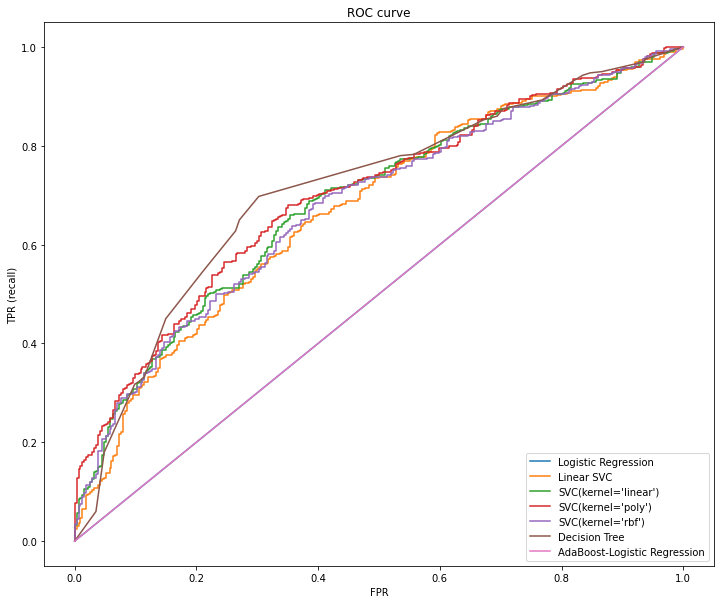

In [881]:
%matplotlib inline 

plt.subplots(figsize = (12,10))

from sklearn.metrics import roc_curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])
fpr_linsvc, tpr_linsvc, thresholds_linsvc = roc_curve(y_test, grid_search_linsvc.decision_function(X_test))
fpr_ksvclin, tpr_ksvclin, thresholds_ksvclin = roc_curve(y_test, grid_search_ksvclin.decision_function(X_test))
fpr_ksvcpoly, tpr_ksvcpoly, thresholds_ksvcpoly = roc_curve(y_test, random_search_ksvcpoly.decision_function(X_test))
fpr_ksvcrbf, tpr_ksvcrbf, thresholds_ksvcrbf = roc_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))
precision_dtree, recall_dtree, thresholds_dtree = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:, 1])
fpr_ada_log, tpr_ada_log, thresholds_ada_log = roc_curve(y_test, ada_log.decision_function(X_test))


plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression")
plt.plot(fpr_linsvc, tpr_linsvc, label="Linear SVC")
plt.plot(fpr_ksvclin, tpr_ksvclin, label="SVC(kernel='linear')")
plt.plot(fpr_ksvcpoly, tpr_ksvcpoly, label="SVC(kernel='poly')")
plt.plot(fpr_ksvcrbf, tpr_ksvcrbf, label="SVC(kernel='rbf')")
plt.plot(fpr_dtree, tpr_dtree, label="Decision Tree")
plt.plot(fpr_ada_log, tpr_ada_log, label="AdaBoost-Logistic Regression")


plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title('ROC curve')

plt.legend(loc=4)


#### Precision Recall Curves

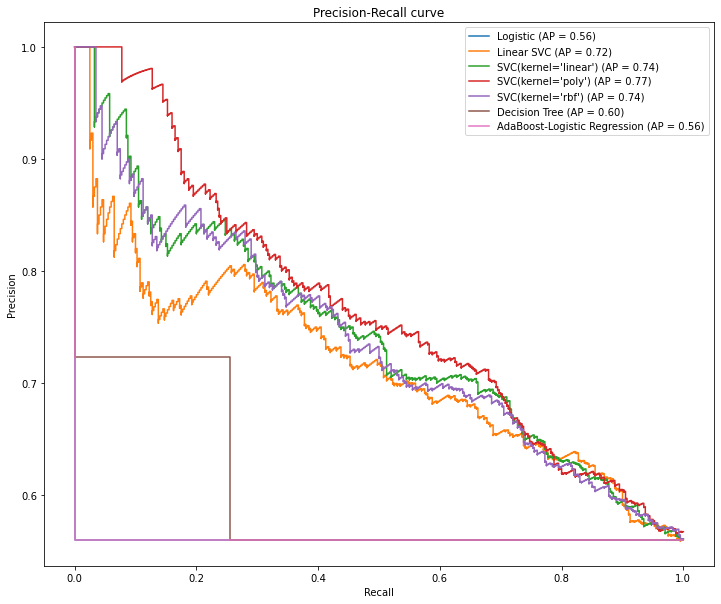

In [868]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plt.subplots(figsize = (12,10))

plot_precision_recall_curve(grid_search_logreg, X_test, y_test, ax = plt.gca(),name = "Logistic")
plot_precision_recall_curve(grid_search_linsvc, X_test, y_test, ax = plt.gca(),name = "Linear SVC")
plot_precision_recall_curve(grid_search_ksvclin, X_test, y_test, ax = plt.gca(),name = "SVC(kernel='linear')")
plot_precision_recall_curve(random_search_ksvcpoly, X_test, y_test, ax = plt.gca(),name = "SVC(kernel='poly')")
plot_precision_recall_curve(grid_search_ksvcrbf, X_test, y_test, ax = plt.gca(),name = "SVC(kernel='rbf')")
plot_precision_recall_curve(grid_search_dtree, X_test, y_test, ax = plt.gca(),name = "Decision Tree")
plot_precision_recall_curve(ada_log, X_test, y_test, ax = plt.gca(),name = "AdaBoost-Logistic Regression")

plt.title('Precision-Recall curve')

plt.legend(loc=1)

#### Final Model  - SVC(kernel='poly')

Comparing the precision recall curves and ROC curves for the good performing models, **SVC(kernel='poly')** is the best performing model.


#### Predicting on the test(test.csv) set if the person accepts the coupon or not.

In [879]:
final_test_prediction = random_search_ksvcpoly.predict(test)

In [883]:
final_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

We can see that the value of target variable is predicted as 1 for all the test instances.
This is because we are trying to minimize false negatives which can be achieved with a high recall score.
The grading metric for this submission is recall, hence used 'recall' as the scoring metric in all models.

In a real-world scenario, a more ideal scoring metric would be fbeta_score which will have a balance between precision and recall, as a result minimizing false positives as well.

In [880]:
final_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,